# German Credit Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns",18)

np.random.seed(1003)

In [2]:
credit_dt = pd.read_csv('German Credit Dataset.csv')

In [3]:
credit_dt.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

* DM - Deutsche Mark(currency of West Germany)
* By analyzing this dataset we should be able to know if the person is a credit defaulter or not. The "default" is a dependent variable and others are independet variables

In [4]:
credit_dt.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [5]:
credit_dt.shape

(1000, 17)

In [6]:
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

### Data Cleaning

In [7]:
#Copy the credit_dt data to credit_df 
credit_df = credit_dt.copy()

In [8]:
credit_df.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

> **Working on the features checking_balance, savings_balance and employment_duration.**

In [9]:
credit_df['checking_balance']. value_counts().index

Index(['unknown', '< 0 DM', '1 - 200 DM', '> 200 DM'], dtype='object')

In [10]:
data_correction = ['checking_balance','savings_balance','employment_duration']
def count_size():
    dict = {}
    for i in data_correction:
        x = credit_df[i].value_counts().index.size
        dict.update({i:x})
    return(dict)

#x = count_size()
#print(x, type(x))

for i in data_correction:
    x = count_size()
    if x[i]==4:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,3)) )
    elif x[i]==5:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,
                        np.where(credit_df[i]== credit_df[i].value_counts().index[3],3,4))) )
          

In [11]:
credit_df.head()

checking_balance  months_loan_duration credit_history  \
0                 1                     6       critical   
1                 2                    48           good   
2                 0                    12       critical   
3                 1                    42           good   
4                 1                    24           poor   

                purpose  amount  savings_balance  employment_duration  \
0  furniture/appliances    1169                1                    1   
1  furniture/appliances    5951                0                    0   
2             education    2096                0                    2   
3  furniture/appliances    7882                0                    2   
4                   car    4870                0                    0   

   percent_of_income  years_at_residence  age other_credit housing  \
0                  4                   4   67         none     own   
1                  2                   2   22         none     own   
2                  2                   3   49         none     own   
3                  2                   4   45         none   other   
4                  3                   4   53         none   other   

   existing_loans_count        job  dependents phone default  
0                     2    skilled           1   yes      no  
1                     1    skilled           1    no     yes  
2                     1  unskilled           2    no      no  
3                     1    skilled           2    no      no  
4                     2    skilled           2    no     yes

In [12]:
for i in data_correction:
    print("*******Original********\n")
    print('-----', i,'-----', '\n', credit_dt[i].value_counts(),'\n')
    print("*******Corrected********\n")
    print('-----', i,'-----', '\n',credit_df[i].value_counts(),'\n')
    

*******Original********

----- checking_balance ----- 
 unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

*******Corrected********

----- checking_balance ----- 
 0    394
1    274
2    269
3     63
Name: checking_balance, dtype: int64 

*******Original********

----- savings_balance ----- 
 < 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

*******Corrected********

----- savings_balance ----- 
 0    603
1    183
2    103
3     63
4     48
Name: savings_balance, dtype: int64 

*******Original********

----- employment_duration ----- 
 1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

*******Corrected********

----- employment_duration ----- 
 0    339
1    253
2    174
3    172
4     62
Name: employment_duration, dtype: int64 



Looking at the above data we can conclude that the data replacement is correctly done


> **Working on feature "purpose".** 

* "furniture/appliances" will be replaced with "appliances"

In [13]:
credit_df['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [14]:
credit_df['purpose'] = np.where(credit_df['purpose']=='furniture/appliances','appliances',credit_df['purpose'])

In [15]:
credit_df['purpose'].value_counts()
# Changes are reflecting.

appliances     473
car            337
business        97
education       59
renovations     22
car0            12
Name: purpose, dtype: int64

In [16]:
print(list(credit_dt.select_dtypes(include = 'object')))
print(len(list(credit_dt.select_dtypes(include = 'object'))))

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
10


In [17]:
print(list(credit_df.select_dtypes(include = 'object')))
print(len(list(credit_df.select_dtypes(include = 'object'))))

['credit_history', 'purpose', 'other_credit', 'housing', 'job', 'phone', 'default']
7


In [18]:
# before changes
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [19]:
# #after changes
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   int32 
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   int32 
 6   employment_duration   1000 non-null   int32 
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

> After the above changes actual numeric variables got converted into numeric from object ( i.e.'checking_balance', 'savings_balance' and 'employment_duration') 

### Checking Missing values

In [20]:
credit_df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

> ***There are no missing values.***

### Checking Duplicates

In [21]:
credit_df.duplicated().sum()

0

In [22]:
credit_df[credit_df.duplicated()]

Empty DataFrame
Columns: [checking_balance, months_loan_duration, credit_history, purpose, amount, savings_balance, employment_duration, percent_of_income, years_at_residence, age, other_credit, housing, existing_loans_count, job, dependents, phone, default]
Index: []

> ***There are no duplicate values.***

### Unique Variables

In [23]:
dict={}
for i in credit_df.columns:
        x = len(credit_df[i].unique())
        dict[i]=x
        #print(f'{i}:\n{x}\n\n')
cnt = pd.DataFrame(dict.items(), columns = ['features','unique_count']).sort_values(by ='unique_count', ignore_index = True) 
cnt

features  unique_count
0                default             2
1             dependents             2
2                  phone             2
3                housing             3
4           other_credit             3
5                    job             4
6   existing_loans_count             4
7       checking_balance             4
8      percent_of_income             4
9     years_at_residence             4
10   employment_duration             5
11       savings_balance             5
12        credit_history             5
13               purpose             6
14  months_loan_duration            33
15                   age            53
16                amount           921

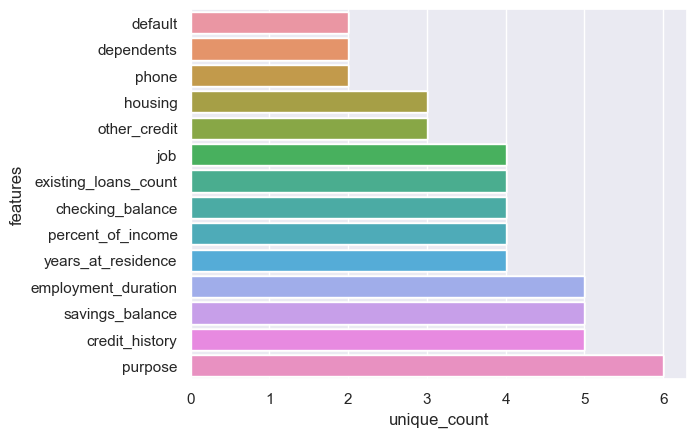

In [24]:
for i in credit_df.columns:

    if i not in ['months_loan_duration','age','amount']:
        sns.barplot(y= cnt['features'][:14], x = cnt['unique_count'][:14])
        #plt.xticks(rotation = 90)        

### Checking Outliers

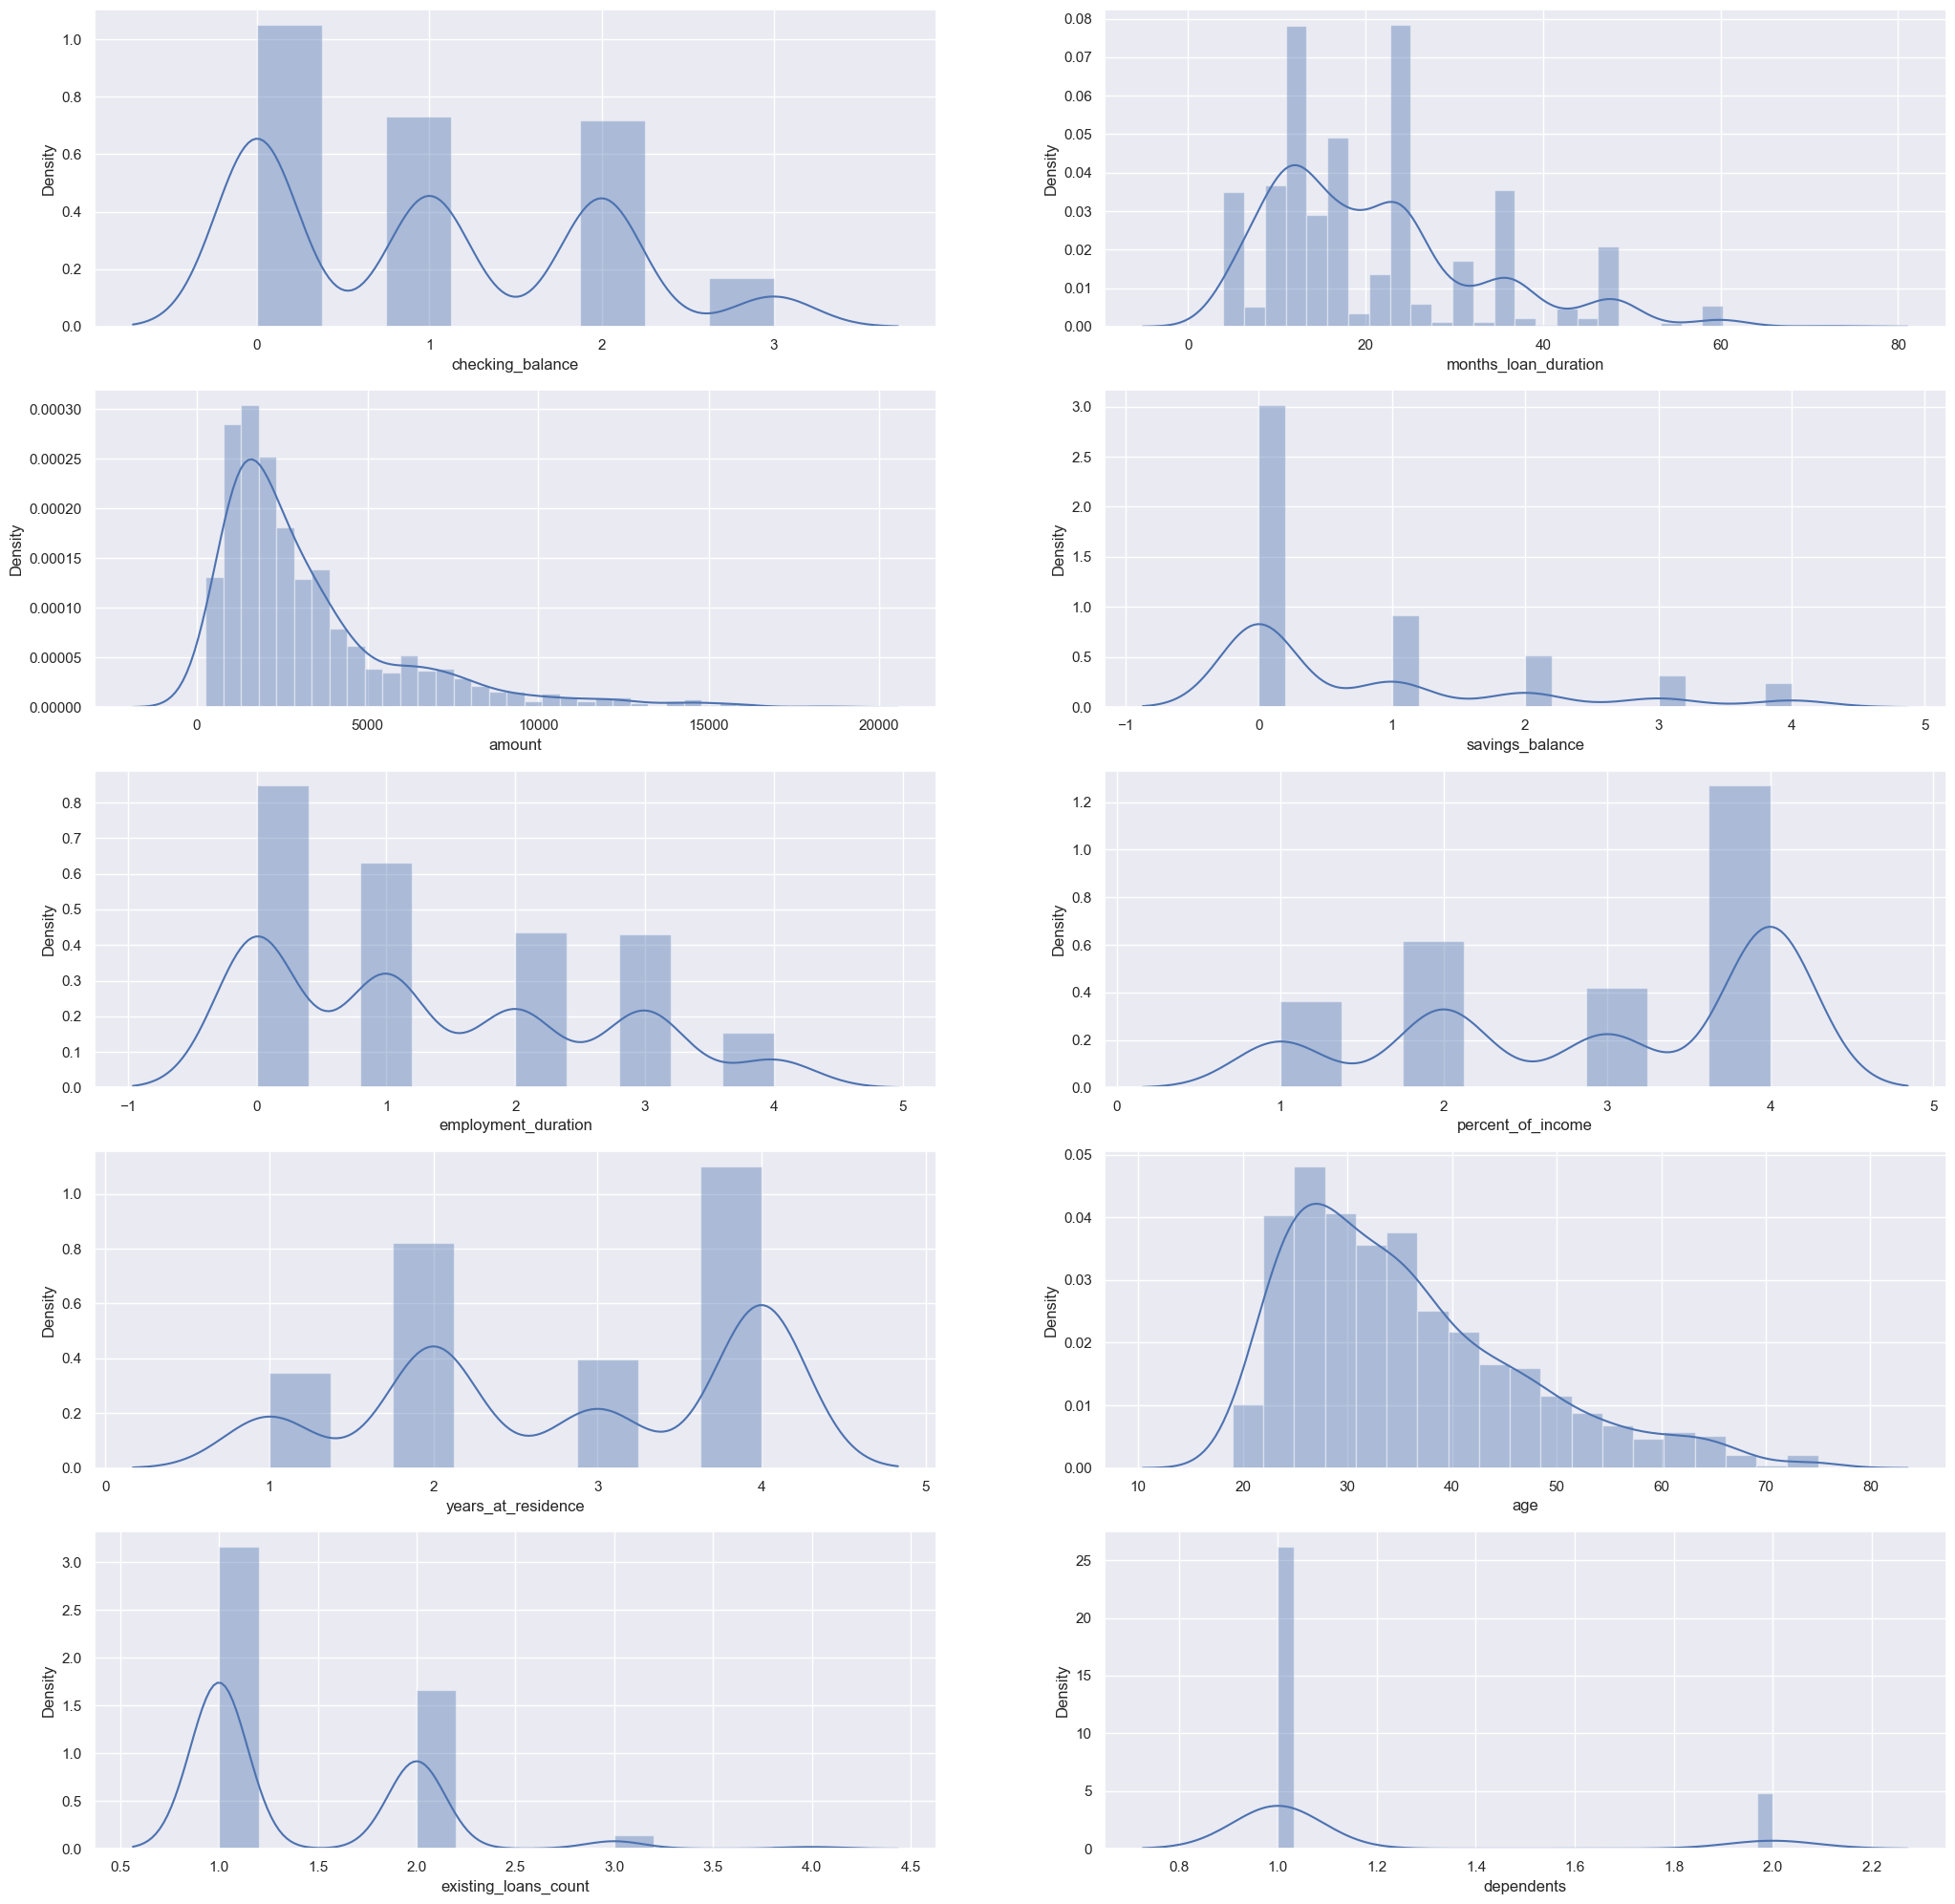

In [25]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = 'int').columns):
    plt.subplot(5,2,x + 1)
    sns.distplot(credit_df[col])    

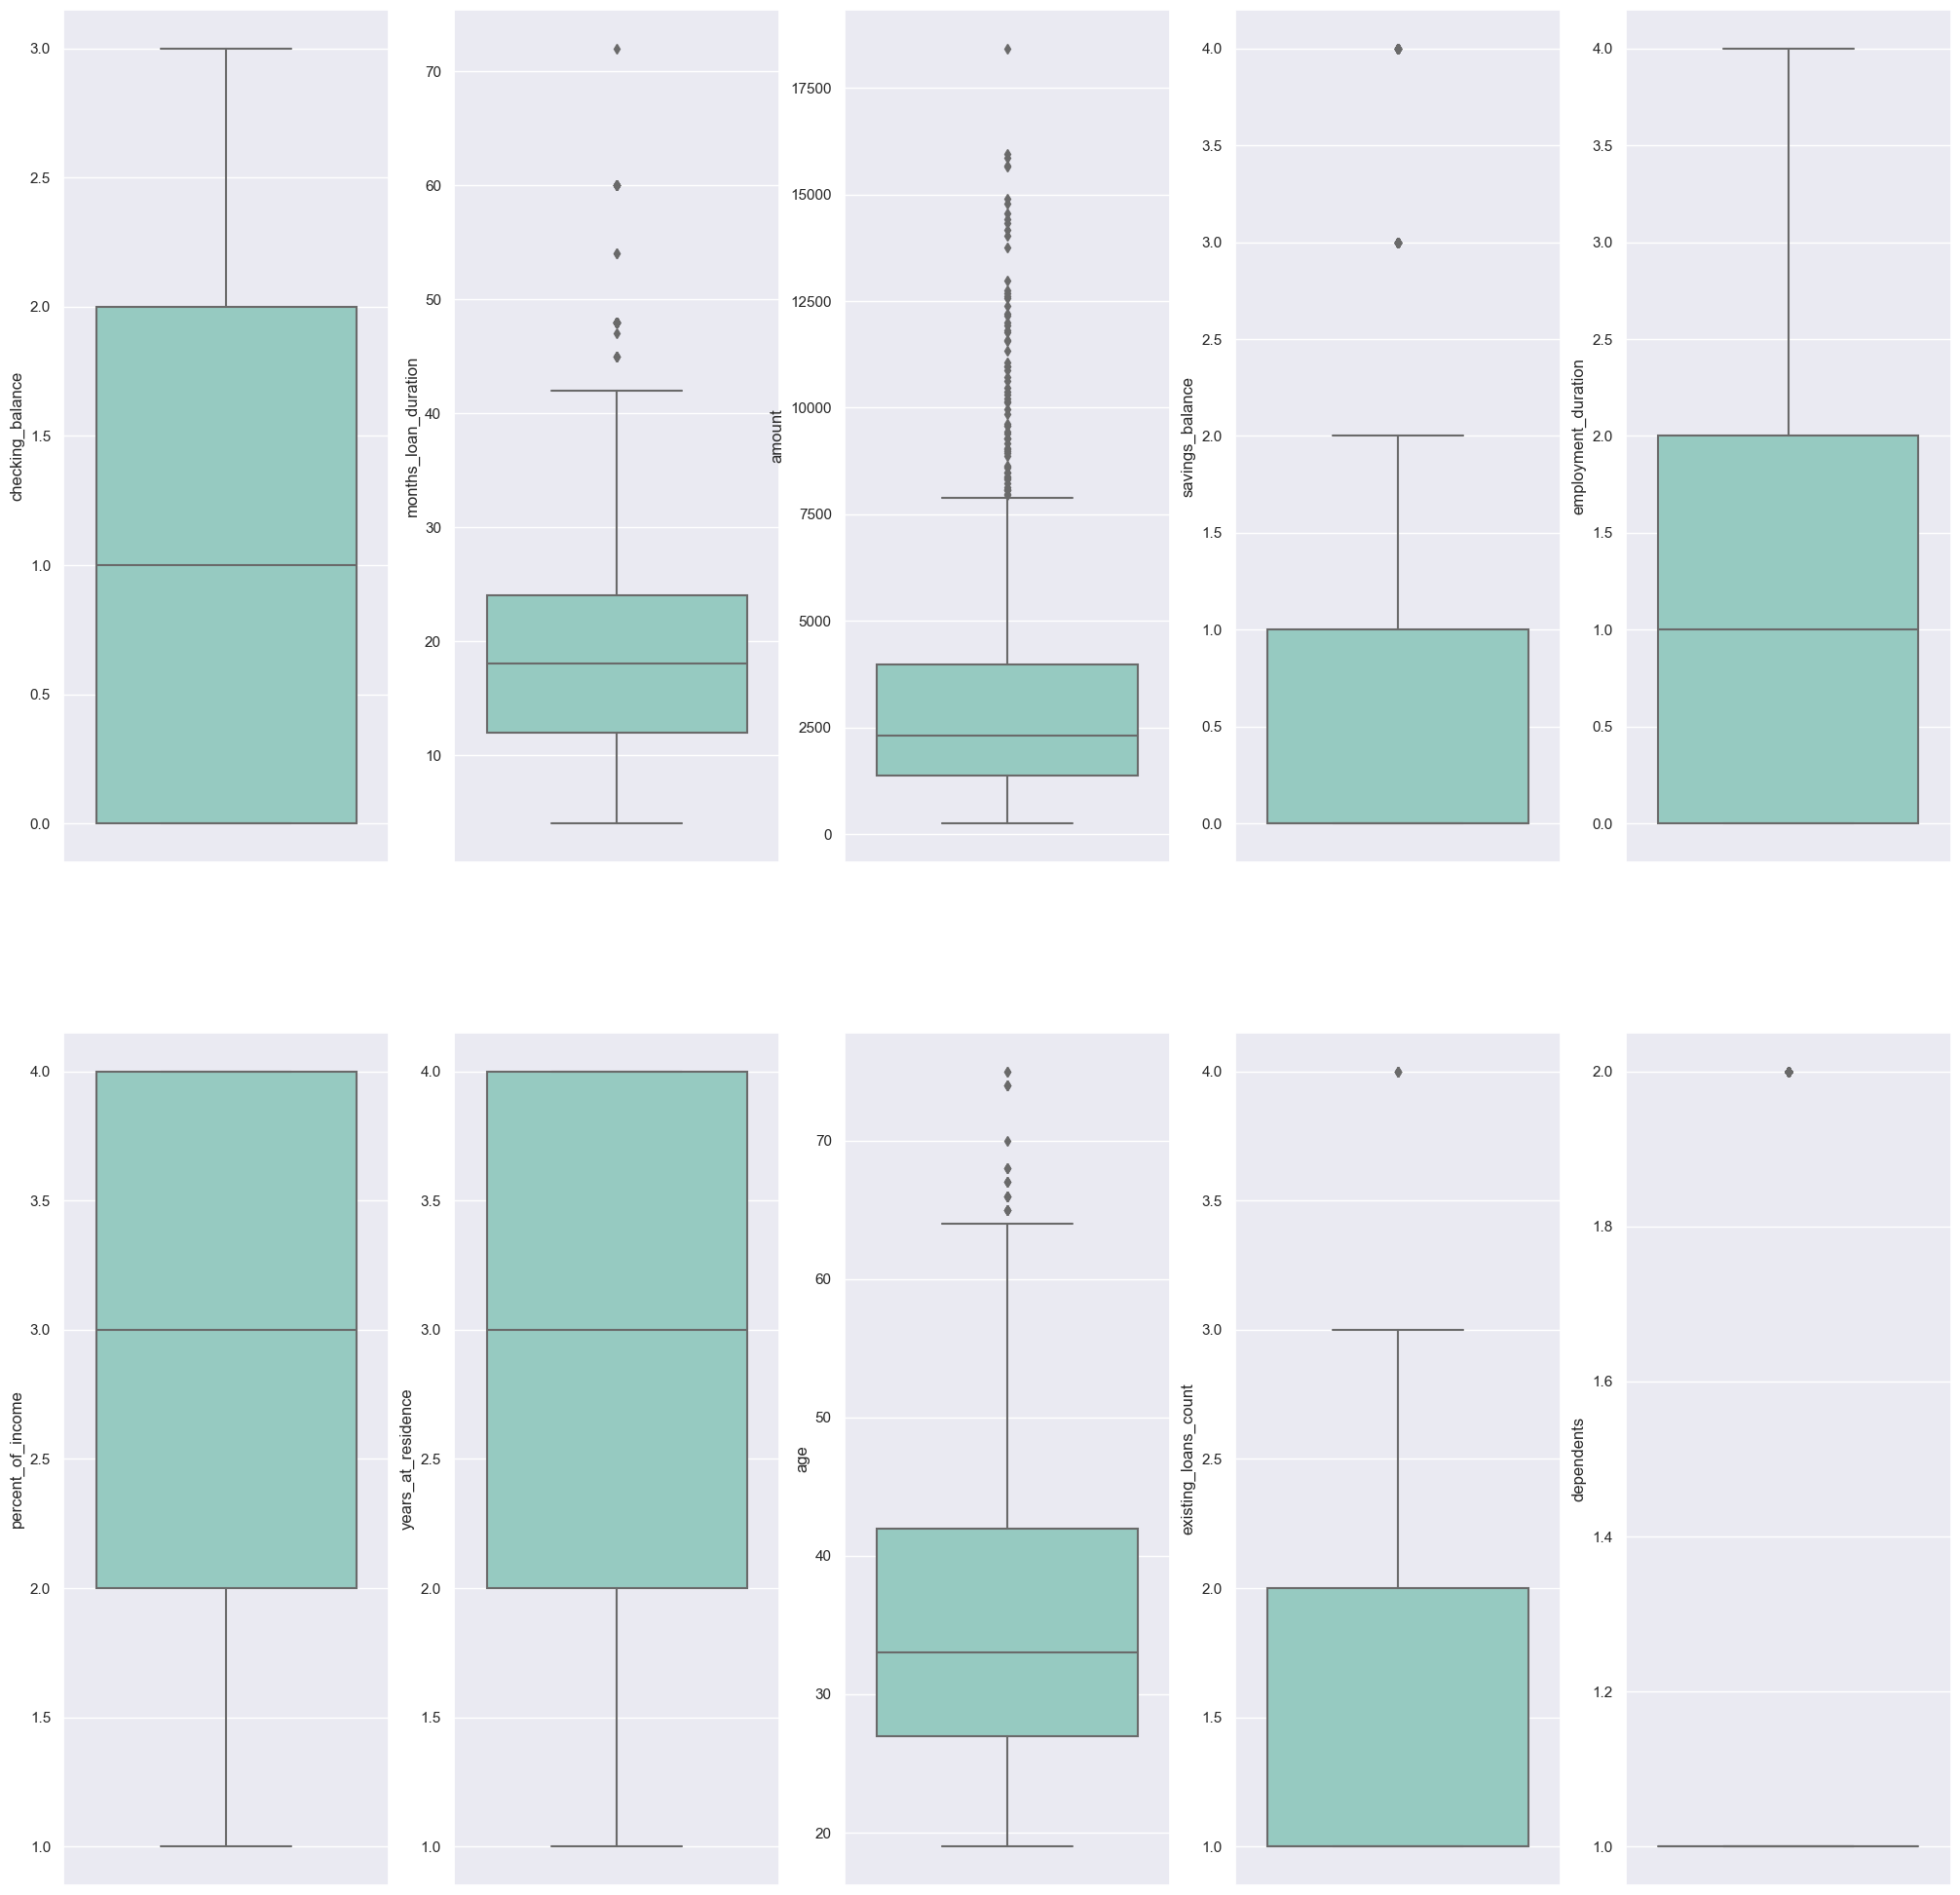

In [26]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = 'int').columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

In [27]:
credit_df.describe().loc[['min','max', '25%', '75%']].T

min      max     25%      75%
checking_balance        0.0      3.0     0.0     2.00
months_loan_duration    4.0     72.0    12.0    24.00
amount                250.0  18424.0  1365.5  3972.25
savings_balance         0.0      4.0     0.0     1.00
employment_duration     0.0      4.0     0.0     2.00
percent_of_income       1.0      4.0     2.0     4.00
years_at_residence      1.0      4.0     2.0     4.00
age                    19.0     75.0    27.0    42.00
existing_loans_count    1.0      4.0     1.0     2.00
dependents              1.0      2.0     1.0     1.00

In [28]:
q1 = credit_df.quantile(0.25)
q3 = credit_df.quantile(0.75)
IQR = q3-q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

dict1 = {}
dict2 = {}
quant_list = []

dict1.update(upper_limit)
dict2.update(lower_limit)
quant_list.append(dict1)
quant_list.append(dict2)

limit = pd.DataFrame(quant_list).T
limit.columns = ['upper_limit', 'lower_limit']
limit

upper_limit  lower_limit
checking_balance            5.000       -3.000
months_loan_duration       42.000       -6.000
amount                   7882.375    -2544.625
savings_balance             2.500       -1.500
employment_duration         5.000       -3.000
percent_of_income           7.000       -1.000
years_at_residence          7.000       -1.000
age                        64.500        4.500
existing_loans_count        3.500       -0.500
dependents                  1.000        1.000

In [29]:
dict_values = {}

for i in ['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
    print(i, ':',credit_df[credit_df[i] > limit.loc[i][0]][i].values,'\n')   

months_loan_duration : [48 48 60 45 48 48 48 54 54 48 48 60 48 48 45 48 48 60 48 48 47 48 48 48
 48 48 48 60 48 60 60 48 48 48 48 48 48 48 48 48 48 60 48 60 48 48 48 60
 72 60 48 48 60 48 48 48 48 48 48 45 48 48 48 48 60 48 60 48 45 45] 

amount : [ 9055  8072 12579  9566 14421  8133  9436 12612 15945 11938  8487 10144
  8613  9572 10623 10961 14555  8978 12169 11998 10722  9398  9960 10127
 11590 13756 14782 14318 12976 11760  8648  8471 11328 11054  8318  9034
  8588  7966  8858 12389 12204  9157 15653  7980  8086 10222 10366  9857
 14027 11560 14179 12680  8065  9271  9283  9629 15857  8335 11816 10875
  9277 15672  8947 10477 18424 14896 12749 10297  8358 10974  8386  8229] 

age : [67 66 66 70 65 74 68 66 75 74 65 75 67 74 65 66 74 66 67 65 68 65 68] 

savings_balance : [3 4 3 3 4 4 3 3 3 3 4 3 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 4 4 3 4 4 3 3 4 3 4
 4 3 4 4 4 3 3 4 3 3 4 4 3 3 3 3 4 4 3 4 4 3 4 4 3 3 3 4 4 3 4 3 3 3 4 3 3
 4 3 3 3 3 4 3 4 3 4 4 3 4 3 4 4 4 3 3 3 3 4 4 3 3 4 4 4 3 3 3 3

<br>

### Handling Outliers

In [30]:
for i in ['amount']:
    credit_df[i].clip(upper = limit.loc[i][0] ,inplace=True)

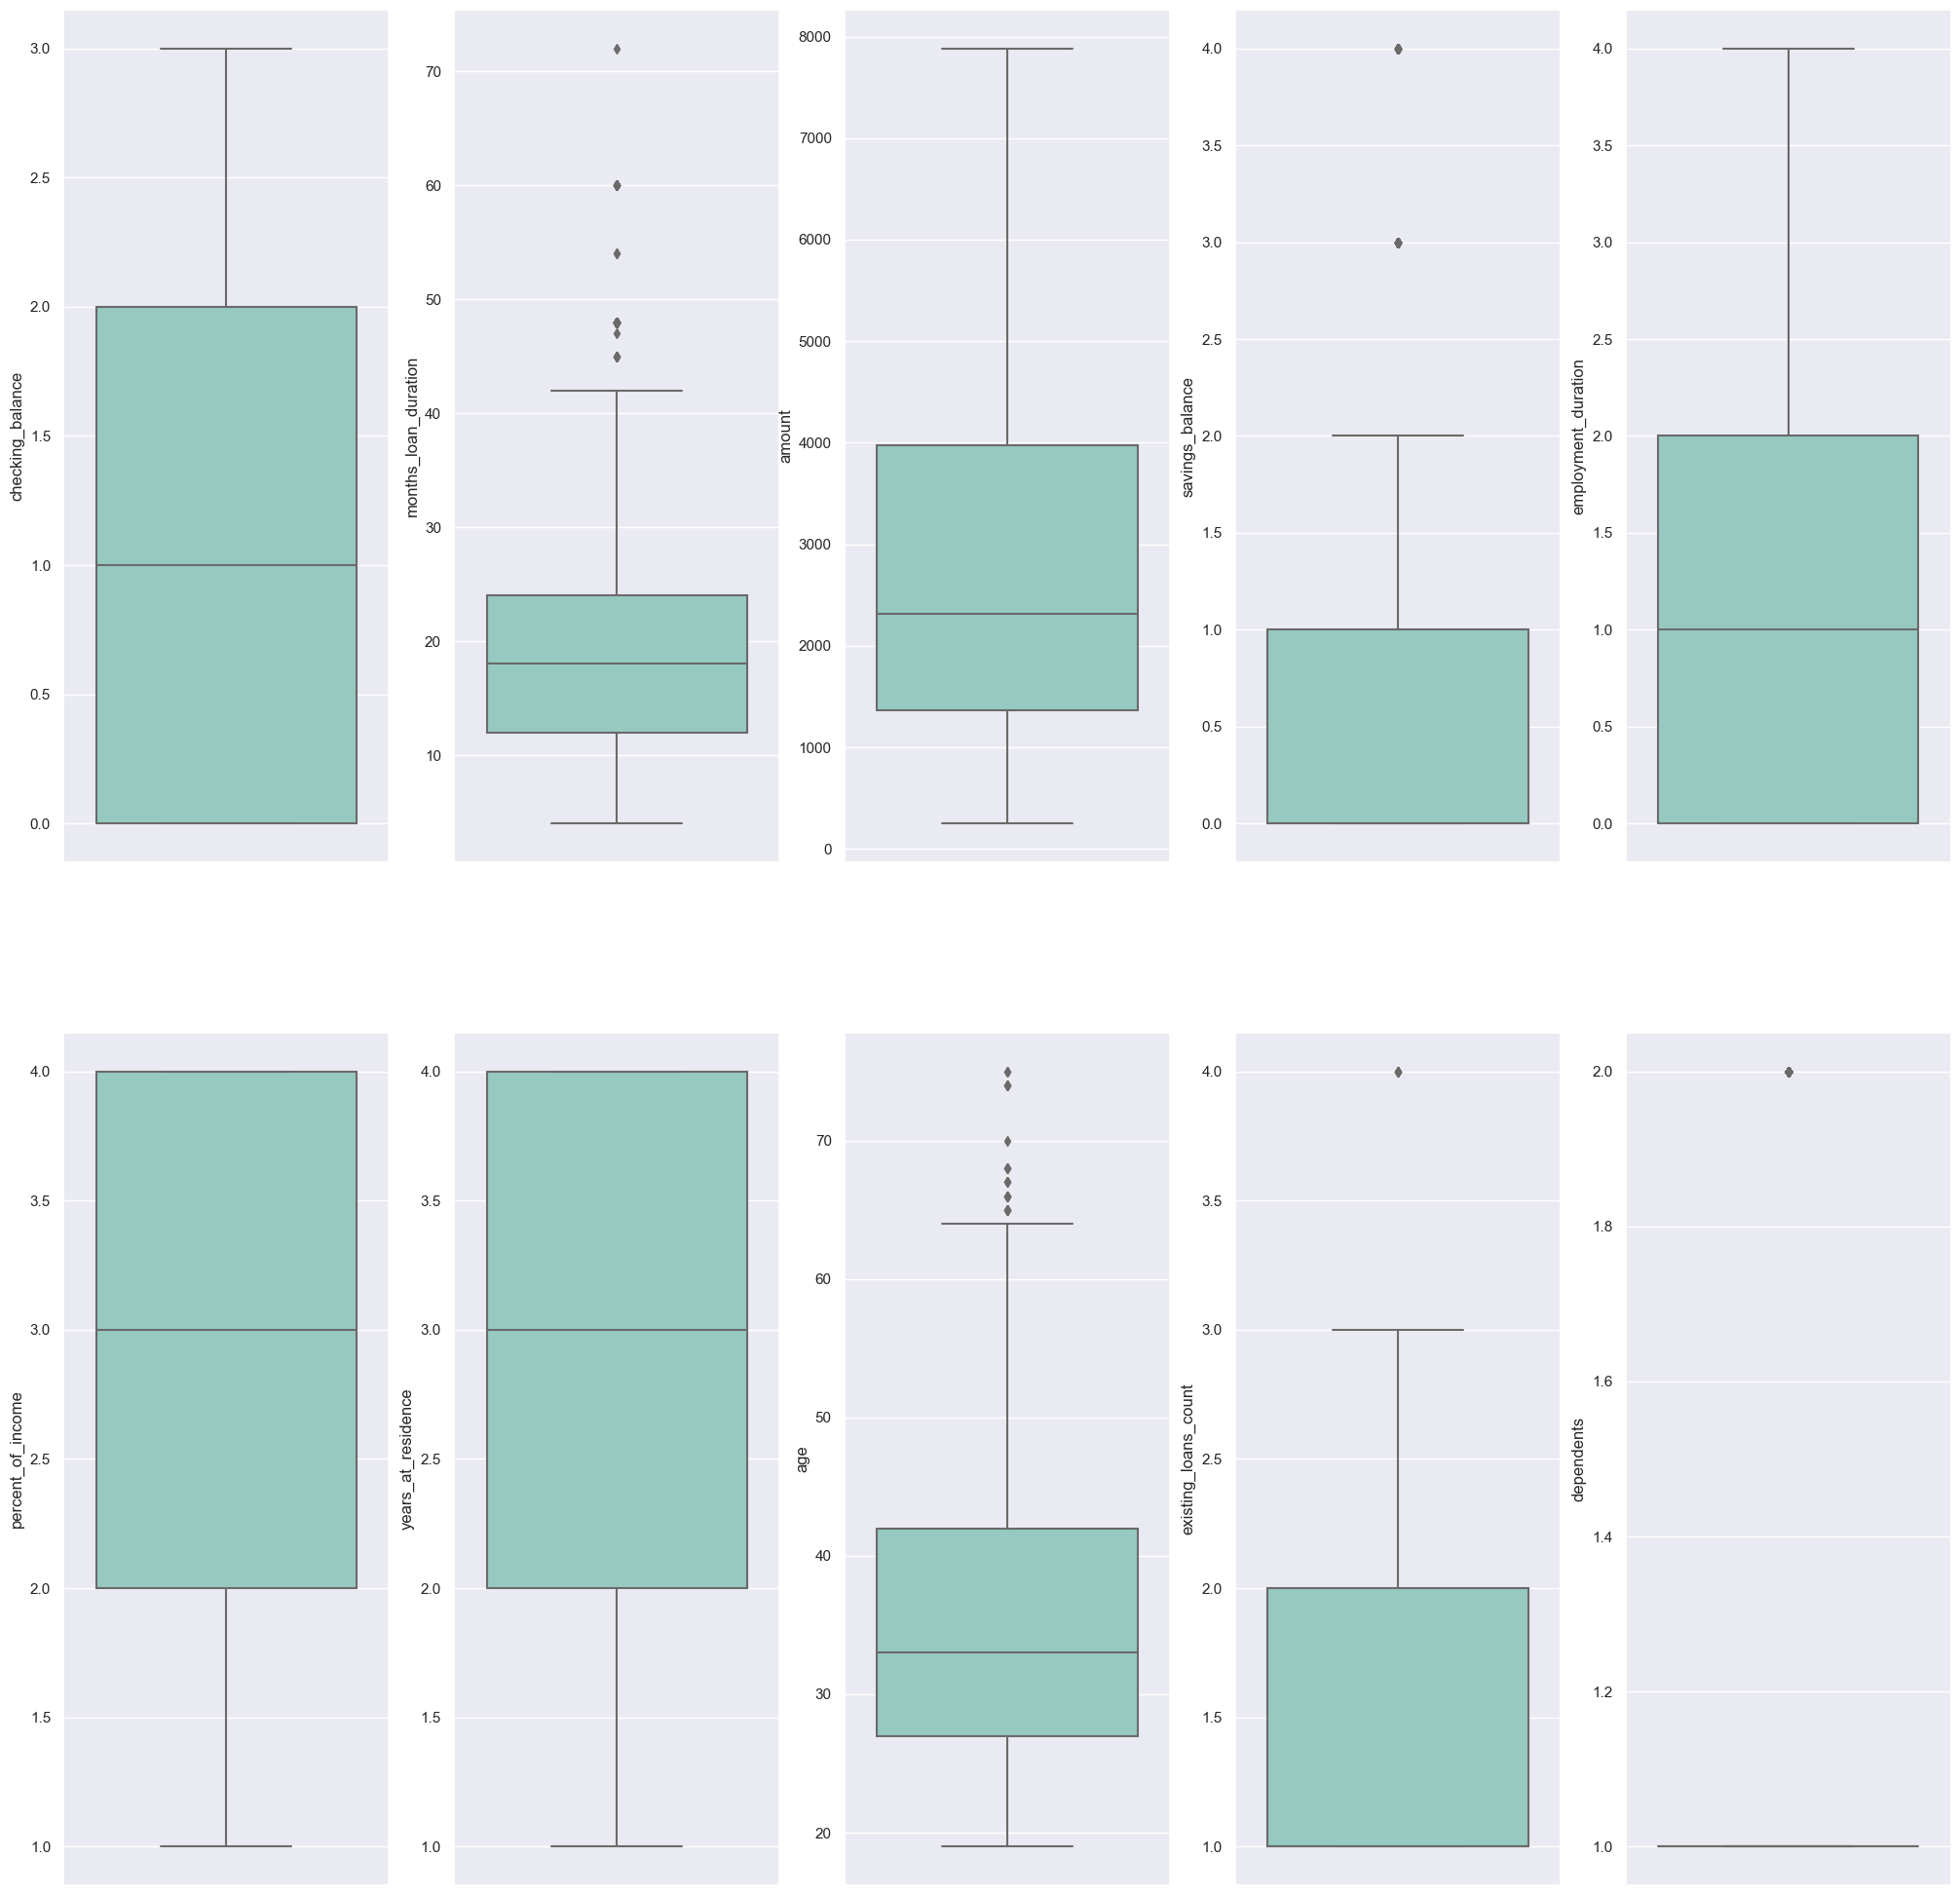

In [31]:
#We have handled the outliers for variable "amount".
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = ['int','float']).columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

In [32]:
#count of values above the upper limit
for i in ['months_loan_duration','amount','age','savings_balance','existing_loans_count','dependents']:
    print(i,' - ',credit_df[credit_df[i] > limit.loc[i][0]].shape[0])

months_loan_duration  -  70
amount  -  0
age  -  23
savings_balance  -  111
existing_loans_count  -  6
dependents  -  155


<br>

### Dropping Variable

**Pre-Prunning**

In [33]:
credit_df.drop(['phone'], axis =1, inplace = True)

### Encoding

In [34]:
lst = ['credit_history','purpose','other_credit','housing','job']
for i in credit_dt.columns:
    if i not in ['months_loan_duration','age','amount']:
        print('='*20,i,'='*20)    
        print(credit_dt[i].value_counts(),'\n')

==================== checking_balance ====================
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

==================== credit_history ====================
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

==================== purpose ====================
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 

==================== savings_balance ====================
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

==================== employment_duration ====================
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

===

**Categorical columns**
1. default
2. job 
3. housing 
4. other_credit 
5. purpose
6. credit_history 

In [35]:
credit_df1 = credit_df.copy()
credit_df1 = pd.get_dummies(credit_df1, columns=['default','job','housing','other_credit','purpose','credit_history'], drop_first = True )

In [36]:
credit_df1.head()

checking_balance  months_loan_duration  amount  savings_balance  \
0                 1                     6  1169.0                1   
1                 2                    48  5951.0                0   
2                 0                    12  2096.0                0   
3                 1                    42  7882.0                0   
4                 1                    24  4870.0                0   

   employment_duration  percent_of_income  years_at_residence  age  \
0                    1                  4                   4   67   
1                    0                  2                   2   22   
2                    2                  2                   3   49   
3                    2                  2                   4   45   
4                    0                  3                   4   53   

   existing_loans_count  ...  purpose_business  purpose_car  purpose_car0  \
0                     2  ...                 0            0             0   
1                     1  ...                 0            0             0   
2                     1  ...                 0            0             0   
3                     1  ...                 0            0             0   
4                     2  ...                 0            1             0   

   purpose_education  purpose_renovations  credit_history_good  \
0                  0                    0                    0   
1                  0                    0                    1   
2                  1                    0                    0   
3                  0                    0                    1   
4                  0                    0                    0   

   credit_history_perfect  credit_history_poor  credit_history_very good  
0                       0                    0                         0  
1                       0                    0                         0  
2                       0                    0                         0  
3                       0                    0                         0  
4                       0                    1                         0  

[5 rows x 27 columns]

In [37]:
pd.DataFrame(credit_df1.columns)

0
0           checking_balance
1       months_loan_duration
2                     amount
3            savings_balance
4        employment_duration
5          percent_of_income
6         years_at_residence
7                        age
8       existing_loans_count
9                 dependents
10               default_yes
11               job_skilled
12            job_unemployed
13             job_unskilled
14               housing_own
15              housing_rent
16         other_credit_none
17        other_credit_store
18          purpose_business
19               purpose_car
20              purpose_car0
21         purpose_education
22       purpose_renovations
23       credit_history_good
24    credit_history_perfect
25       credit_history_poor
26  credit_history_very good

In [38]:
credit_df1 = credit_df1.rename(columns = {'default_yes':'default'})

In [39]:
pd.DataFrame(credit_df1.columns)

0
0           checking_balance
1       months_loan_duration
2                     amount
3            savings_balance
4        employment_duration
5          percent_of_income
6         years_at_residence
7                        age
8       existing_loans_count
9                 dependents
10                   default
11               job_skilled
12            job_unemployed
13             job_unskilled
14               housing_own
15              housing_rent
16         other_credit_none
17        other_credit_store
18          purpose_business
19               purpose_car
20              purpose_car0
21         purpose_education
22       purpose_renovations
23       credit_history_good
24    credit_history_perfect
25       credit_history_poor
26  credit_history_very good

<br>

### Seperate Indpendent And Dependent Variables

In [40]:
x = credit_df1.drop(['default'], axis=1)
y = credit_df1[['default']]

In [41]:
print(credit_df1.shape)
print(x.shape)
print(y.shape)
print(y.head())

(1000, 27)
(1000, 26)
(1000, 1)
   default
0        0
1        1
2        0
3        0
4        1


### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
fsc = StandardScaler()
sc_x = fsc.fit_transform(x)
sc_x

array([[-1.04541732e-03, -1.23647786e+00, -8.60961077e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [ 1.04437190e+00,  2.24819436e+00,  1.32654951e+00, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [-1.04646274e+00, -7.38667543e-01, -4.36907895e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       ...,
       [-1.04646274e+00, -7.38667543e-01, -1.02792916e+00, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [-1.04541732e-03,  1.99928920e+00, -5.51727041e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01],
       [ 1.04437190e+00,  1.99928920e+00,  6.97560166e-01, ...,
        -2.04124145e-01, -3.10630372e-01, -2.26990552e-01]])

<br>

### Imbalance Check

In [43]:
y.value_counts()

default
0          700
1          300
dtype: int64

 
> ***This is an imbalance data. (300*2=600 < 700)***

### Handle Imbalance Data 

In [44]:
# Oversampling method
import imblearn

In [45]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_sam, y_sam = over.fit_resample(sc_x,y)

In [46]:
y_sam.value_counts()

default
0          700
1          700
dtype: int64

<br>

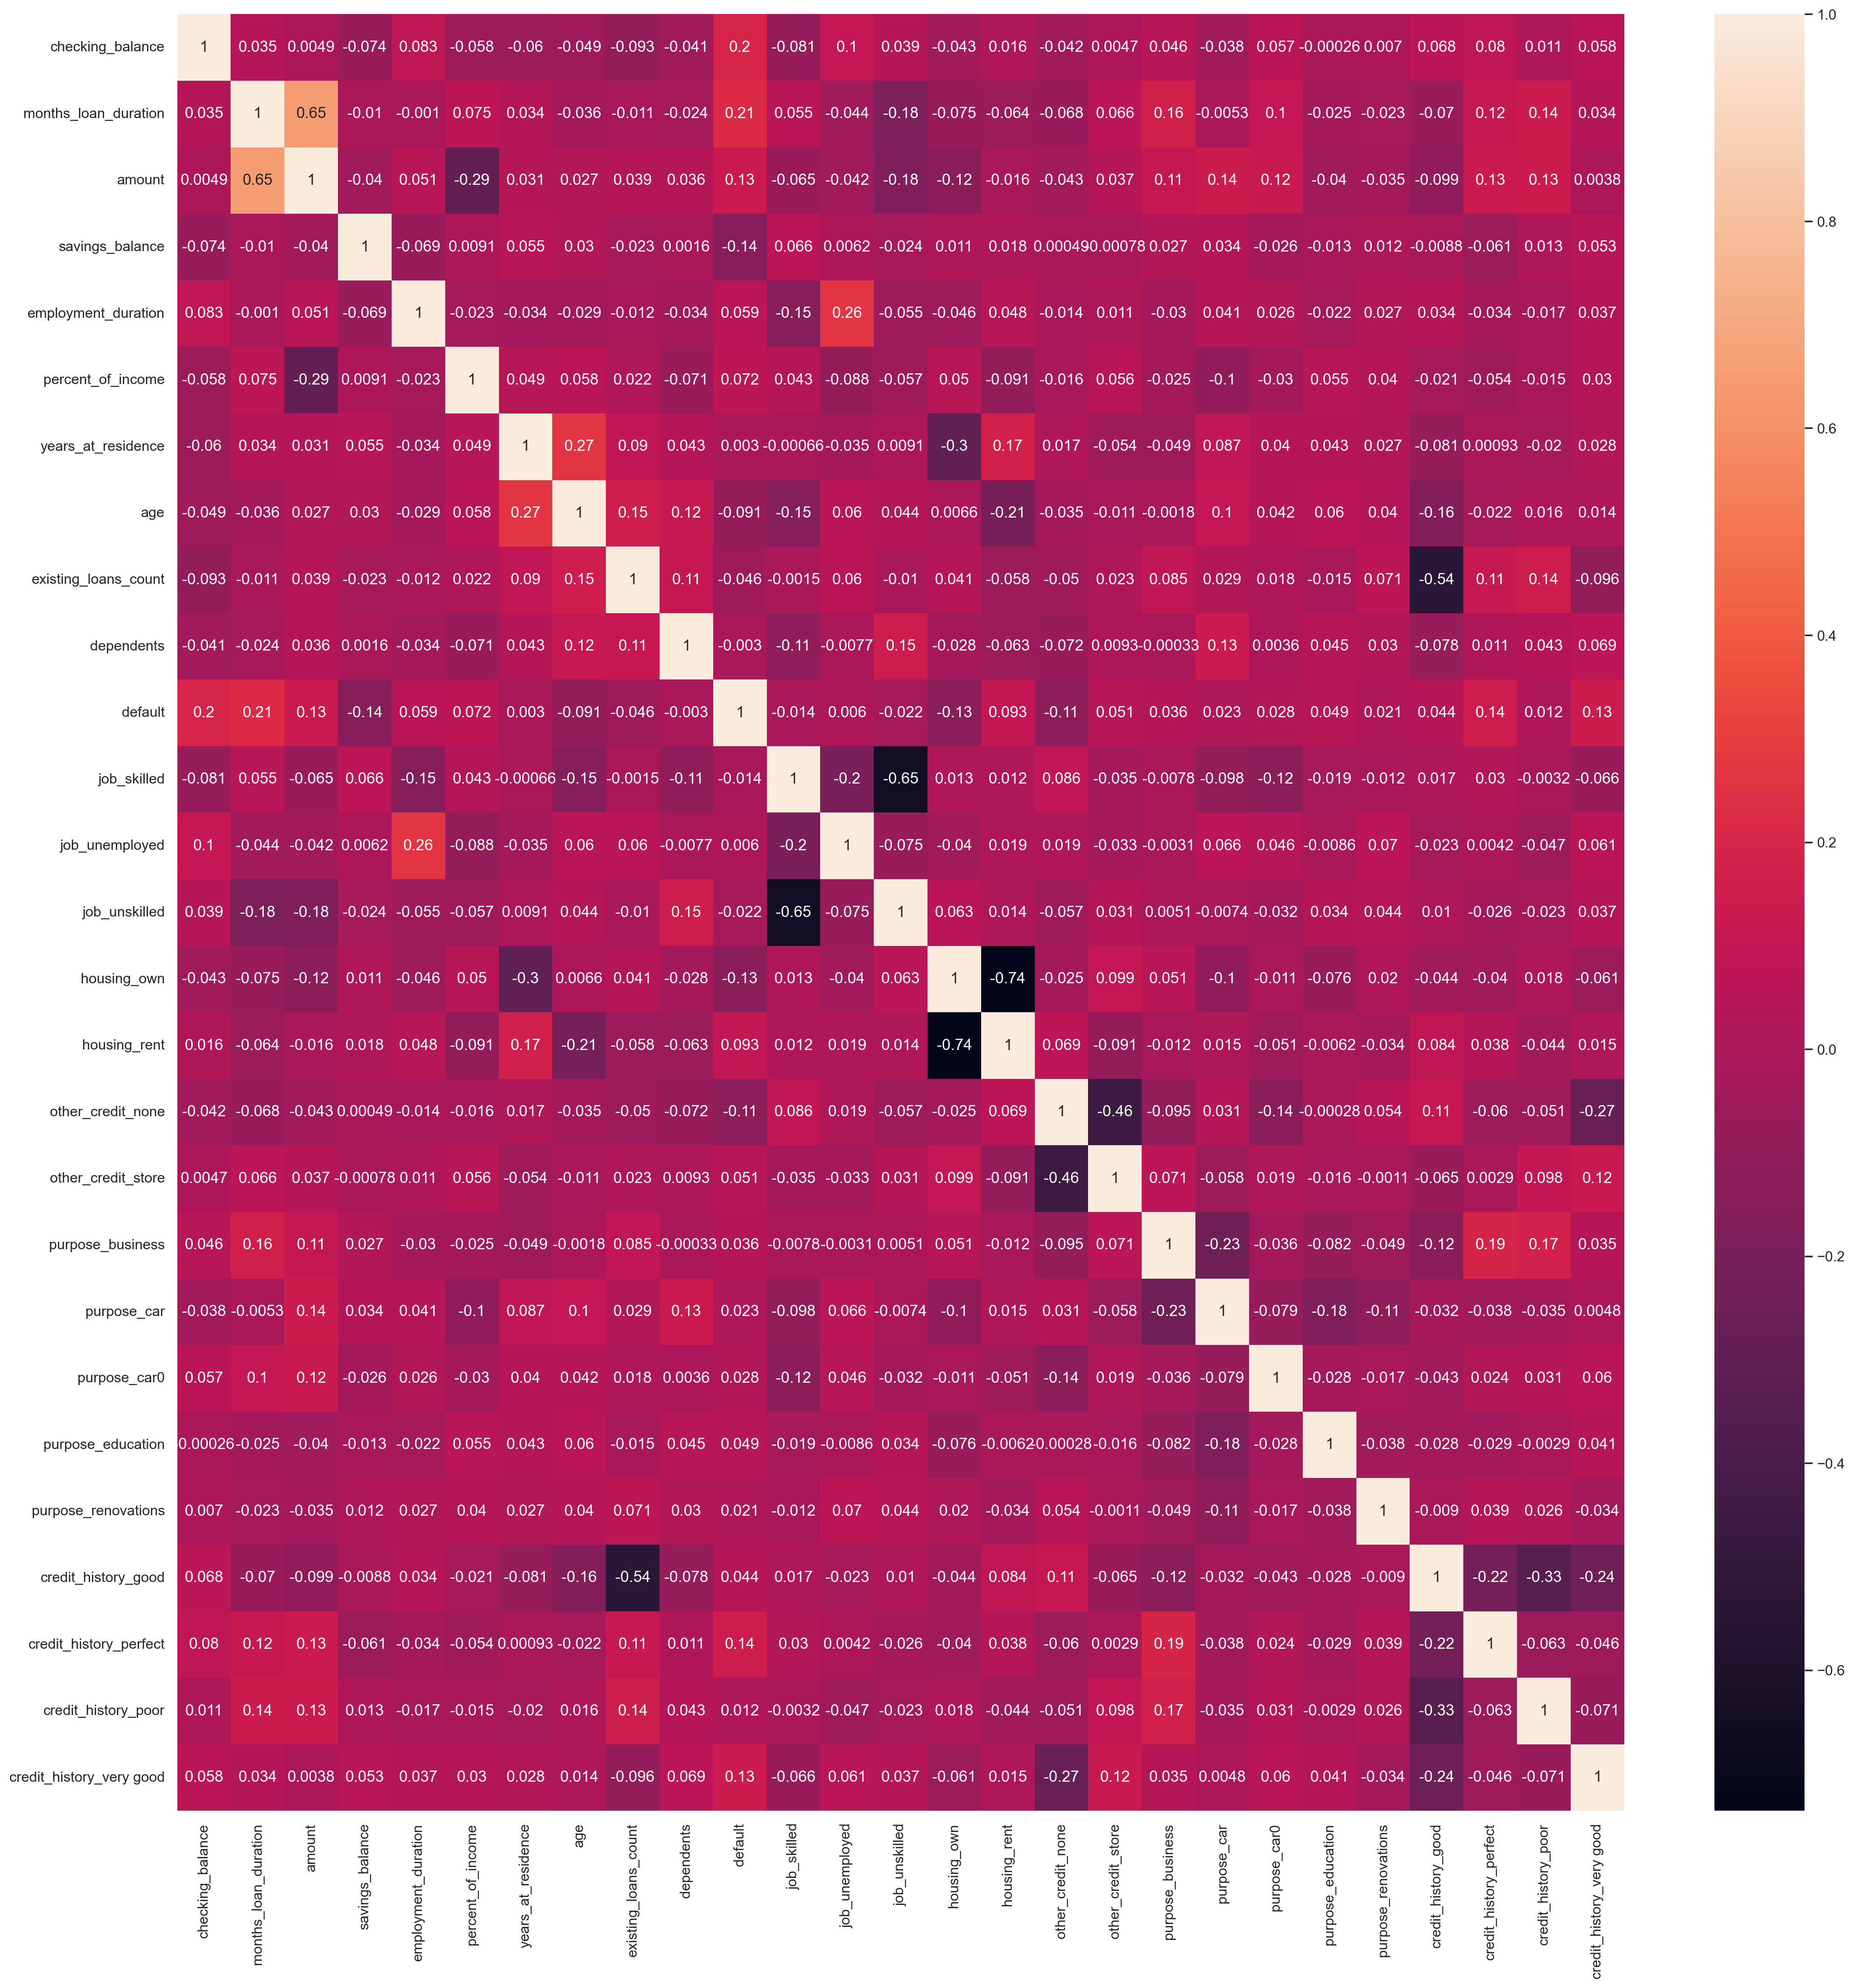

In [47]:
plt.figure(figsize =(25,25), dpi = 200)
sns.heatmap(data = credit_df1.corr(), annot =True)
plt.show()

<br>

### Splitting Test And Train Dataset

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size = 0.25, random_state =100, stratify=y_sam)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1050, 26) (350, 26) (1050, 1) (350, 1)


<br>

### Model Building

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# 1. Logestic Regression

* Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms.
* it’s referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. 
* The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

**Types of logistic regression:**

1. <u>Binary logistic regression:</u> target variable can have only 2 possible types: “0” or “1”
2. <u>Multinomial logistic regression:</u> target variable can have 3 or more possible types which are not ordered like “disease A” vs “disease B” vs “disease C”. In this case, the softmax function is used in place of the sigmoid function.
3. <u>Ordinal logistic regression:</u> It deals with target variables with ordered categories. For example, a test score can be categorized as: “very poor”, “poor”, “good”, or “very good”.

* Sigmoid function : It converts the continuous variable data into the probability i.e. between 0 and 1.

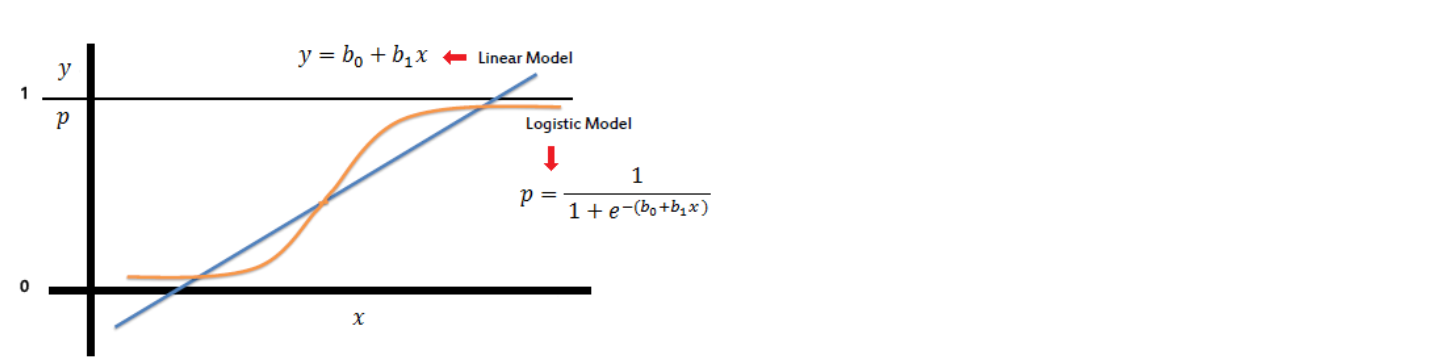

**Performance Matrices:**

	1. Accuracy
	2. Confusion matrix
		1) TPR (True positive Rate)
		2) FPR (False positive Rate)
		3) TNR(True Negative Rate)
		4) FNR(False Negative Rate)
	3. Precision  - True positive from positive predicted class
	4. Recall/sensitivity - True positive from positive actual class
	5. F1 -Score - Combination of precision and recall

	- The higher the precision, recall, and F1-score value better the result.


> **Build the Model**

In [50]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
lr_model

LogisticRegression()

In [51]:
def model_report(model):
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    dt_train_acc = accuracy_score(y_train, y_predict_train)
    dt_test_acc = accuracy_score(y_test, y_predict_test)
    dt_train_cr = classification_report(y_train, y_predict_train)
    dt_test_cr = classification_report(y_test, y_predict_test)
    dt_train_cm = confusion_matrix(y_train, y_predict_train)
    dt_test_cm = confusion_matrix(y_test, y_predict_test)
    print(f'Train accuracy score: {dt_train_acc}\nTest accuracy score: {dt_test_acc}\n\nTrain classification report:\n {dt_train_cr}\nTest classification report\n {dt_test_cr}\n\nTrain confusion matrix:\n {dt_train_cm}\nTest confusion matrix:\n {dt_test_cm}')

> **Evaluate The Model**

In [52]:
model_report(lr_model)

Train accuracy score: 0.7028571428571428
Test accuracy score: 0.7314285714285714

Train classification report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       525
           1       0.71      0.69      0.70       525

    accuracy                           0.70      1050
   macro avg       0.70      0.70      0.70      1050
weighted avg       0.70      0.70      0.70      1050

Test classification report
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       175
           1       0.75      0.70      0.72       175

    accuracy                           0.73       350
   macro avg       0.73      0.73      0.73       350
weighted avg       0.73      0.73      0.73       350


Train confusion matrix:
 [[376 149]
 [163 362]]
Test confusion matrix:
 [[134  41]
 [ 53 122]]


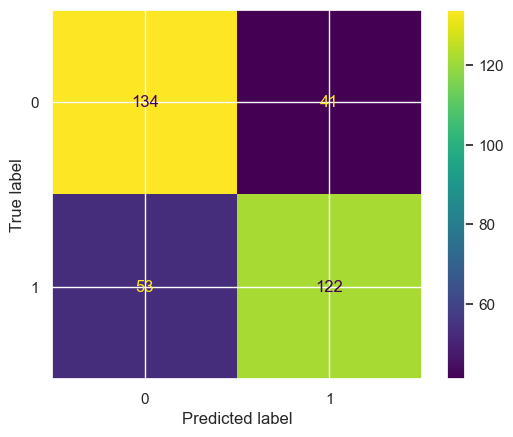

In [53]:
y_lr_predict_test = lr_model.predict(x_test)
cm = confusion_matrix(y_test, y_lr_predict_test, labels = lr.classes_  )
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
display.plot()
plt.show()

<br>

**Understanding Confusion Matrix**  


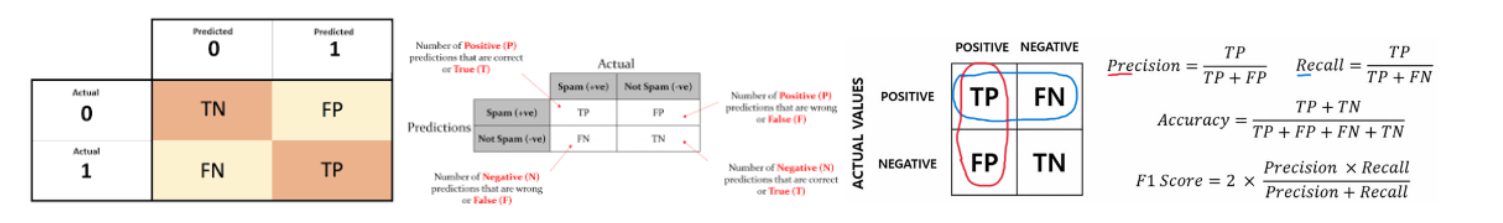

<br>

* Higher the recall/sensitivity, precision and F1-score better the result.

> **ROC/AUC**

In [54]:
# roc_auc for test data
lr_roc_auc = roc_auc_score(y_test,y_lr_predict_test )
print("The roc_auc_score for logestic regression is : ", lr_roc_auc)

The roc_auc_score for logestic regression is :  0.7314285714285713


In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_test)

In [56]:
print("fpr : ", fpr)
print("tpr : ", tpr)
print("Thresholds : ", thresholds)

fpr :  [0.         0.23428571 1.        ]
tpr :  [0.         0.69714286 1.        ]
Thresholds :  [2 1 0]


<br>

**True Positive Rate(TPR) & False Positive Rate(FPR)**     

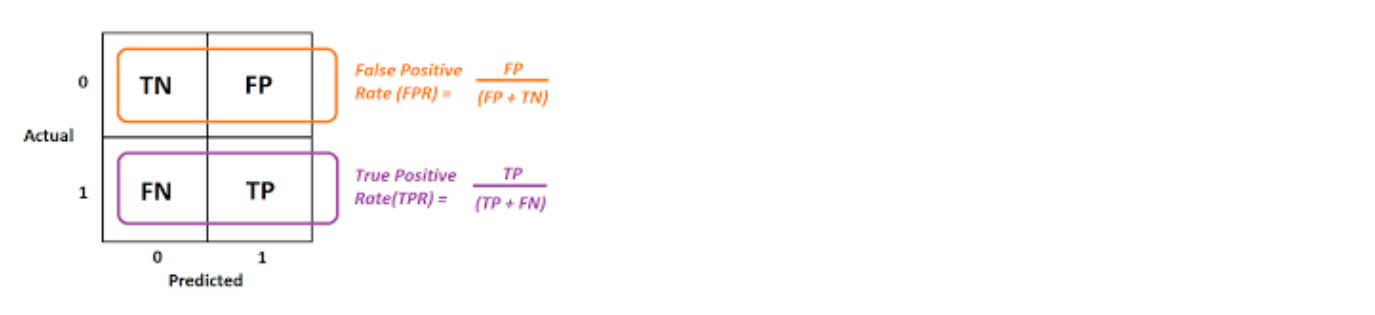

* ROC: Receiver Operating Characteristics
* AUC: Area Under Curve

AUC stands for Area Under the Curve, and the AUC curve represents the area under the ROC curve. It measures the overall performance of the binary classification model. As both TPR and FPR range between 0 to 1, So, the area will always lie between 0 and 1, and A greater value of AUC denotes better model performance. Our main goal is to maximize this area in order to have the highest TPR and lowest FPR at the given threshold

* AUC measures how well a model is able to distinguish between classes.

The classification threshold that returns the upper-left corner of the curve—minimizing the difference between TPR and FPR—is the optimal threshold.



<br>

> **Plotting the ROC-AUC curve**

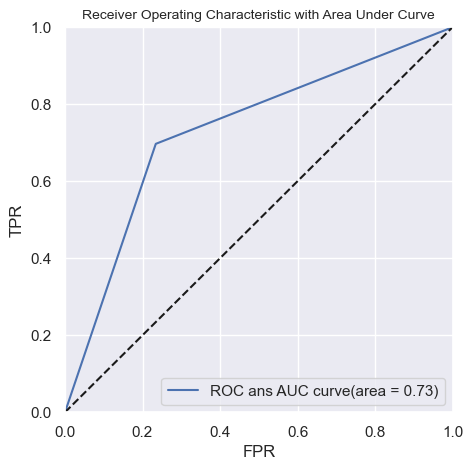

In [57]:
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = "ROC ans AUC curve(area = %0.2f)" %lr_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic with Area Under Curve', fontsize =10)
plt.legend(loc='lower right')
plt.show()

<br>

> **Cross Validation**

In [58]:
def cross_validation(model):
    Training_CV = cross_val_score(model, x_train, y_train, cv =10)
    Testing_CV = cross_val_score(model, x_test, y_test, cv= 10)
    Avg_Training_CV = Training_CV.mean()
    Avg_Testing_CV = Testing_CV.mean()

    print(f"Training CV: {Training_CV}\n\nTesting CV: {Testing_CV}\n\nAvg_Training_CV: {Avg_Training_CV}\n\nAvg_Testing_CV: {Avg_Testing_CV}")

In [59]:
cross_validation(lr_model)

Training CV: [0.65714286 0.68571429 0.62857143 0.68571429 0.60952381 0.64761905
 0.73333333 0.75238095 0.7047619  0.7047619 ]

Testing CV: [0.68571429 0.6        0.85714286 0.68571429 0.74285714 0.74285714
 0.71428571 0.68571429 0.91428571 0.65714286]

Avg_Training_CV: 0.680952380952381

Avg_Testing_CV: 0.7285714285714285


<br>

# 2. Decision Tree

* A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks.
* A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm.

**Decision Tree Termology:**

1. Root Node: The initial node at the beginning of a decision tree, where the entire population or dataset starts dividing based on various features or conditions.
2. Decision Nodes: Nodes resulting from the splitting of root nodes are known as decision nodes. These nodes represent intermediate decisions or conditions within the tree.
3. Leaf/Terminal Nodes: Nodes where further splitting is not possible, often indicating the final classification or outcome. Leaf nodes are also referred to as terminal nodes.
4. Sub-Tree: Similar to a subsection of a graph being called a sub-graph, a sub-section of a decision tree is referred to as a sub-tree. It represents a specific portion of the decision tree.
5. Pruning: The process of removing or cutting down specific nodes in a decision tree to prevent overfitting and simplify the model.
6. Branch / Sub-Tree: A subsection of the entire decision tree is referred to as a branch or sub-tree. It represents a specific path of decisions and outcomes within the tree.
7. Parent Node: The node that divides into one or more child nodes.
8. Child Node: The nodes that emerge when a parent node is split.

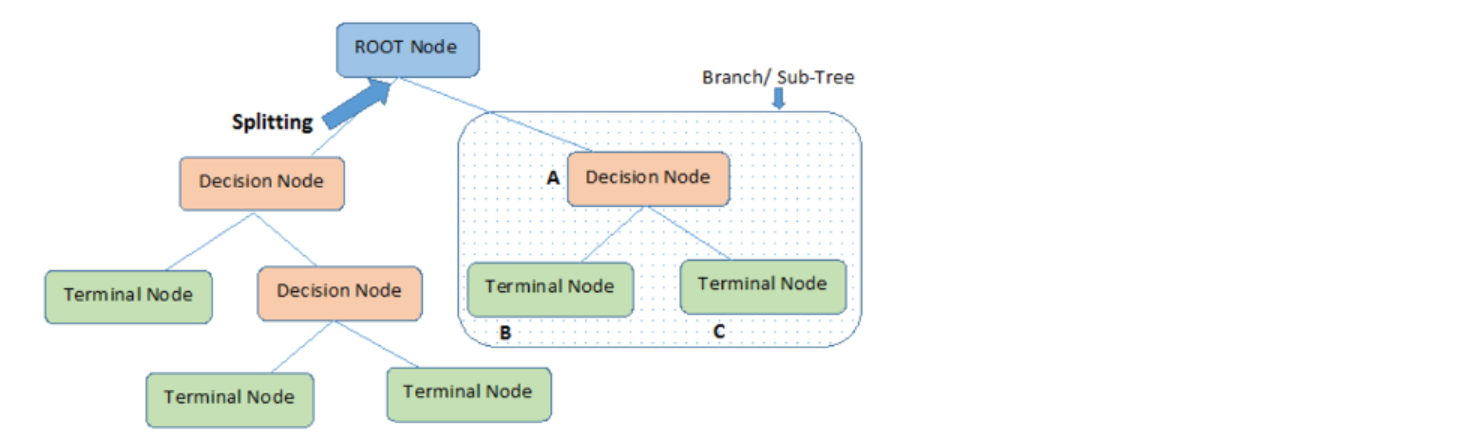

**Attributes Selection Measures:**

* Attribute selection measure (ASM) is a criterion used in decision tree algorithms to evaluate the usefulness of different attributes for splitting a dataset. 
* The goal of ASM is to identify the attribute that will create the most homogeneous subsets of data after the split, thereby maximizing the information gain.

1. Entropy: Entropy is the measure of the degree of randomness or uncertainty in the dataset. In the case of classifications, It measures the randomness based on the distribution of class labels in the dataset.
2. Gini Impurity or index: Gini Impurity is a score that evaluates how accurate a split is among the classified groups.we want to have a Gini index score as low as possible.
3. Information Gain: Information gain measures the reduction in entropy or variance that results from splitting a dataset based on a specific property. It is used in decision tree algorithms to determine the usefulness of a feature by partitioning the dataset into more homogeneous subsets with respect to the class labels or target variable. The higher the information gain, the more valuable the feature is in predicting the target variable. 

Information gain is used in both classification and regression decision trees. In classification, entropy is used as a measure of impurity, while in regression, variance is used as a measure of impurity. The information gain calculation remains the same in both cases, except that entropy or variance is used instead of entropy in the formula.

> **Build the model**

In [60]:
dtc = DecisionTreeClassifier()    #criterion - 'gini'
dt_model = dtc.fit(x_train, y_train)
dt_model

DecisionTreeClassifier()

> **Evaluate The model**

In [61]:
model_report(dt_model)

Train accuracy score: 1.0
Test accuracy score: 0.8142857142857143

Train classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       525

    accuracy                           1.00      1050
   macro avg       1.00      1.00      1.00      1050
weighted avg       1.00      1.00      1.00      1050

Test classification report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       175
           1       0.78      0.87      0.82       175

    accuracy                           0.81       350
   macro avg       0.82      0.81      0.81       350
weighted avg       0.82      0.81      0.81       350


Train confusion matrix:
 [[525   0]
 [  0 525]]
Test confusion matrix:
 [[132  43]
 [ 22 153]]


<div class="alert alert-block alert-info">
Here, we could see the overfitting between train and test accuracy. Below we will see with prunning technique we are able to reduce it. </div>

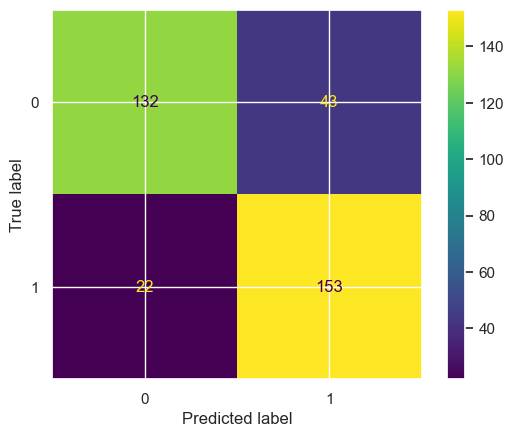

In [62]:
def confus_matrix(x):
    plot_confusion_matrix(x, x_test,y_test)
    plt.show()

confus_matrix(dt_model)

> **Feature Importance**

In [63]:
pd.DataFrame(dt_model.feature_importances_, index = x.columns, columns= ['Feature Importance']).sort_values(by = 'Feature Importance')

Feature Importance
purpose_car0                        0.000000
other_credit_store                  0.000000
housing_own                         0.001270
purpose_renovations                 0.002239
dependents                          0.002373
job_unemployed                      0.005079
job_unskilled                       0.005550
credit_history_perfect              0.006139
housing_rent                        0.008575
purpose_business                    0.010605
purpose_education                   0.013165
credit_history_poor                 0.014309
credit_history_good                 0.014790
existing_loans_count                0.015435
job_skilled                         0.018665
credit_history_very good            0.020737
percent_of_income                   0.024304
purpose_car                         0.028178
years_at_residence                  0.033751
savings_balance                     0.036109
other_credit_none                   0.052473
employment_duration                 0.075623
months_loan_duration                0.085339
age                                 0.152508
checking_balance                    0.161769
amount                              0.211014

> **Post Prunning**

In [64]:
prunned_dt = DecisionTreeClassifier(max_depth = 5, random_state = 100)
prunned_dt_model = prunned_dt.fit(x_train, y_train)
prunned_dt_model

DecisionTreeClassifier(max_depth=5, random_state=100)

In [65]:
model_report(prunned_dt_model)

Train accuracy score: 0.7619047619047619
Test accuracy score: 0.7342857142857143

Train classification report:
               precision    recall  f1-score   support

           0       0.94      0.56      0.70       525
           1       0.69      0.97      0.80       525

    accuracy                           0.76      1050
   macro avg       0.81      0.76      0.75      1050
weighted avg       0.81      0.76      0.75      1050

Test classification report
               precision    recall  f1-score   support

           0       0.90      0.53      0.66       175
           1       0.67      0.94      0.78       175

    accuracy                           0.73       350
   macro avg       0.78      0.73      0.72       350
weighted avg       0.78      0.73      0.72       350


Train confusion matrix:
 [[293 232]
 [ 18 507]]
Test confusion matrix:
 [[ 92  83]
 [ 10 165]]


<div class="alert alert-block alert-info">
With prunning technique the variance between the train and test accuracy has been reduced. </div>

> **Cross Validation**

In [66]:
cross_validation(prunned_dt_model)

Training CV: [0.64761905 0.76190476 0.68571429 0.72380952 0.68571429 0.78095238
 0.74285714 0.7047619  0.6952381  0.73333333]

Testing CV: [0.74285714 0.71428571 0.8        0.65714286 0.68571429 0.74285714
 0.65714286 0.6        0.77142857 0.68571429]

Avg_Training_CV: 0.7161904761904763

Avg_Testing_CV: 0.7057142857142857


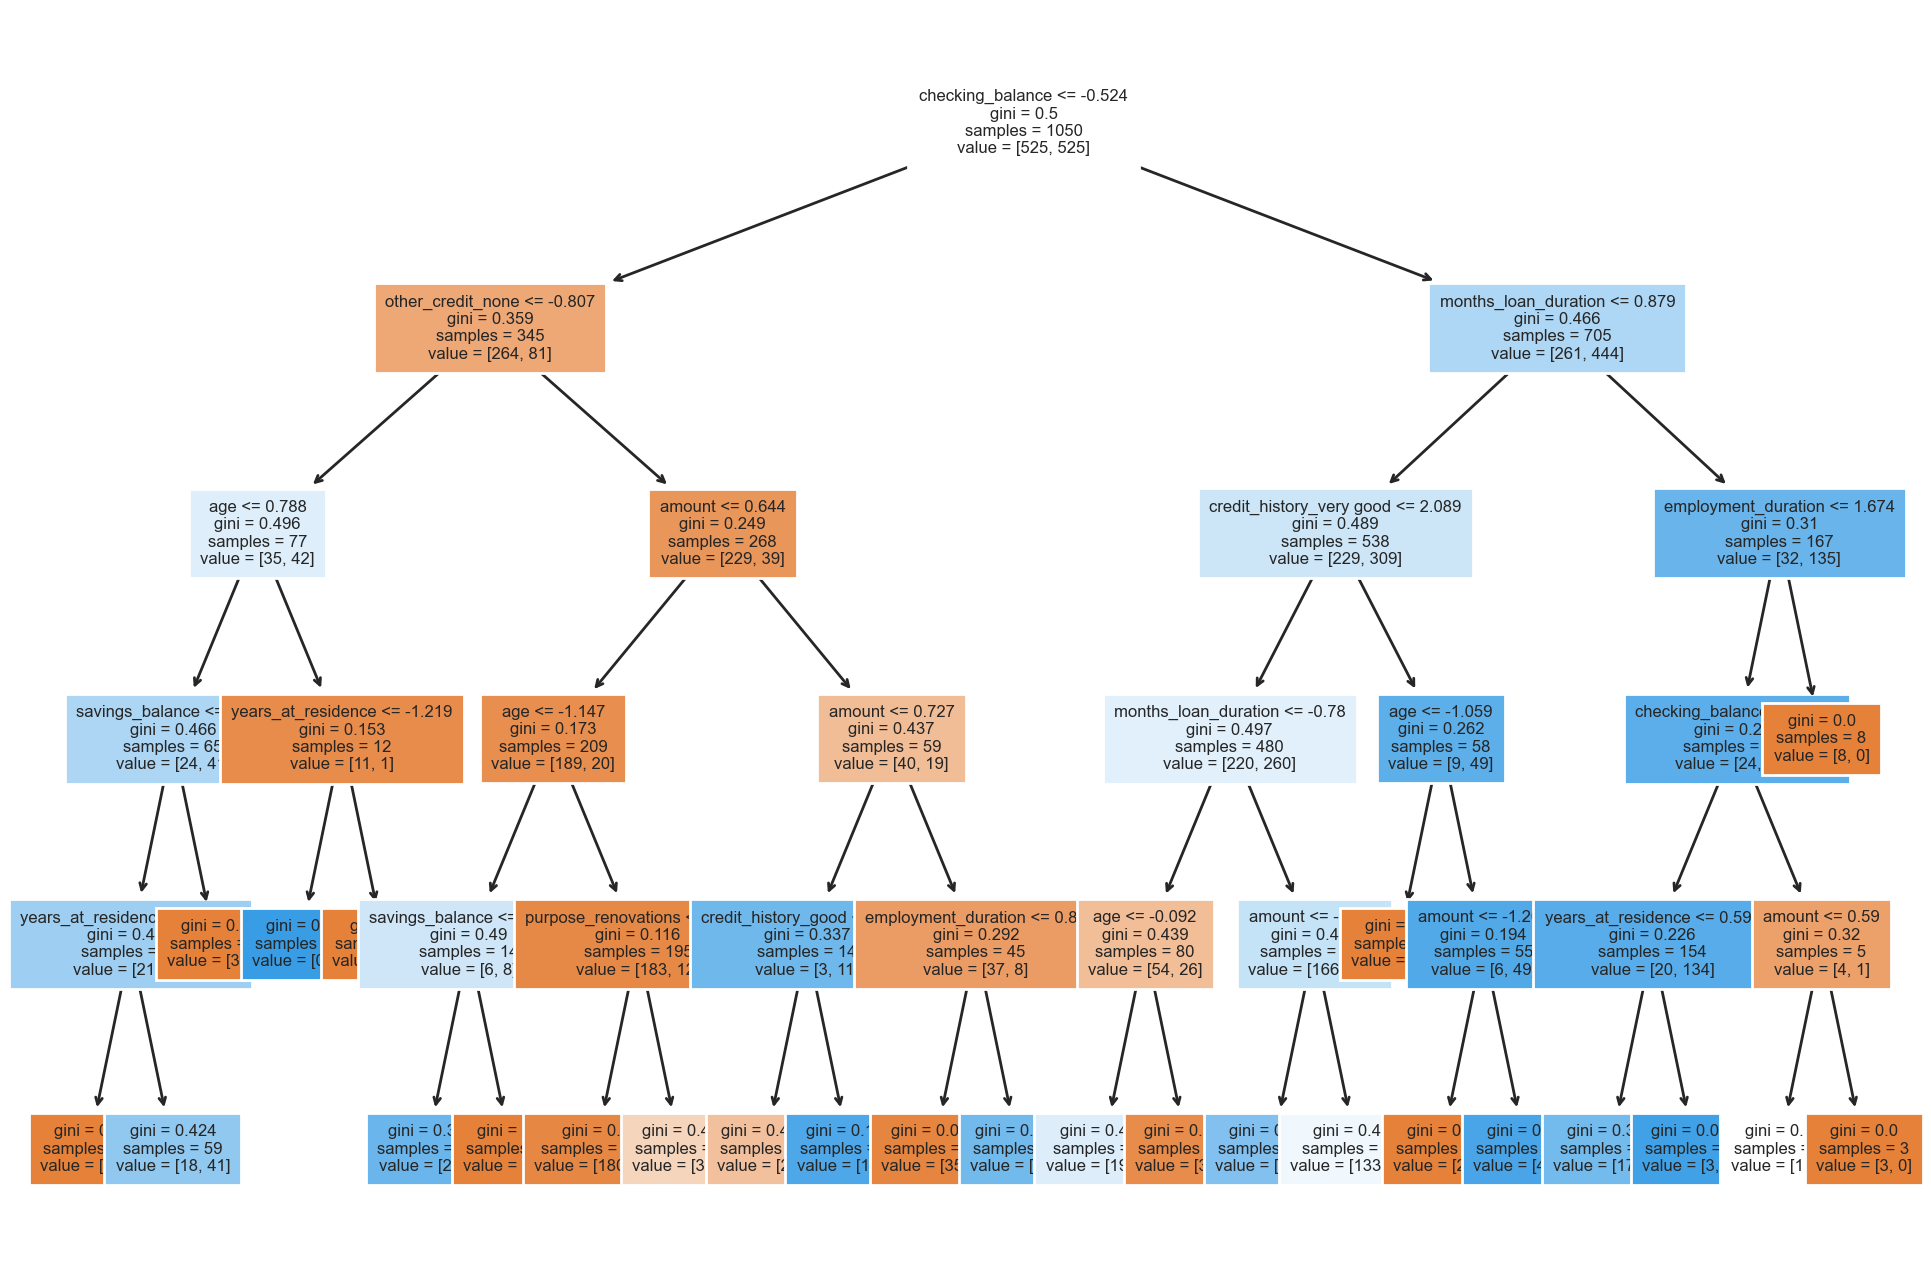

In [67]:
plt.figure(figsize = (12,8), dpi =200)
plot_tree(prunned_dt_model, feature_names = x.columns, filled = True, fontsize = 6)
plt.show()

<br>

# 3. Bagging Classifier

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset.<br>

**Workflow:**

1. Random subsets are selected from training data with replacement.
2. Individual subsets are parallelly trained as individual model
3. At the end result of each model is aggregated depending on type of task - regression or classification
4. If clssification - consider majority vote<br>
   If regression - consider mean or median

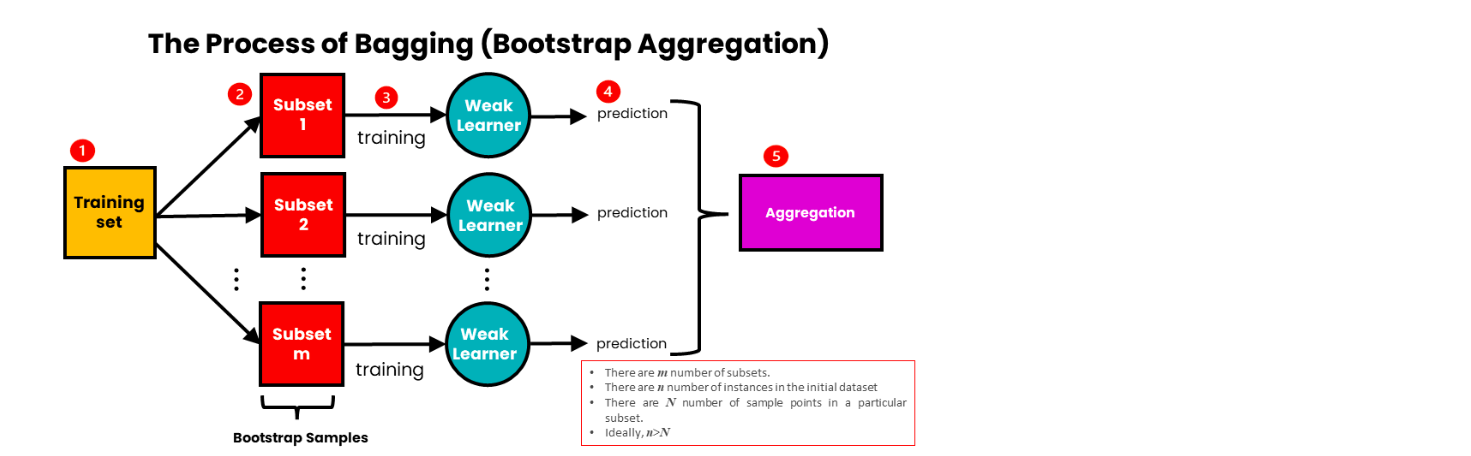

**Ensemble Learning**<br>

Ensemble learning refers to a group of base learners, or models, which work collectively to achieve a better final prediction. A single model(base learner) may not perform well individually due to high variance or high bias. However, when weak learners are aggregated, they can form a strong learner, as their combination reduces bias or variance, yielding better model performance.

> **Build the model**

In [68]:
bc = BaggingClassifier(base_estimator = RandomForestClassifier(max_depth = 6),random_state = 100)
bc_model = bc.fit(x_train, y_train)
bc_model

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6),
                  random_state=100)

> **Evaluate the Model**

In [69]:
model_report(bc_model)

Train accuracy score: 0.8380952380952381
Test accuracy score: 0.8142857142857143

Train classification report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       525
           1       0.80      0.90      0.85       525

    accuracy                           0.84      1050
   macro avg       0.84      0.84      0.84      1050
weighted avg       0.84      0.84      0.84      1050

Test classification report
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       175
           1       0.78      0.89      0.83       175

    accuracy                           0.81       350
   macro avg       0.82      0.81      0.81       350
weighted avg       0.82      0.81      0.81       350


Train confusion matrix:
 [[405 120]
 [ 50 475]]
Test confusion matrix:
 [[130  45]
 [ 20 155]]


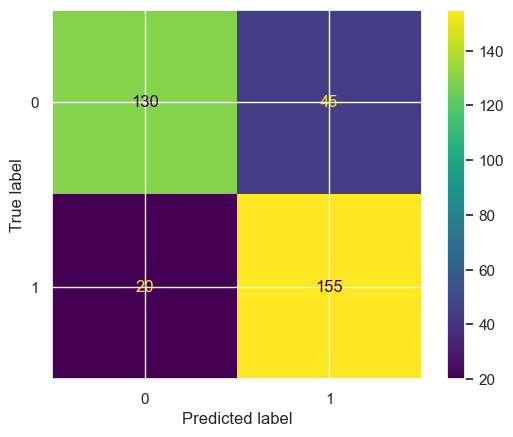

In [70]:
confus_matrix(bc_model)

In [71]:
cross_validation(bc_model)

Training CV: [0.72380952 0.76190476 0.72380952 0.79047619 0.72380952 0.72380952
 0.78095238 0.82857143 0.76190476 0.75238095]

Testing CV: [0.68571429 0.74285714 0.82857143 0.85714286 0.74285714 0.8
 0.68571429 0.74285714 0.88571429 0.74285714]

Avg_Training_CV: 0.7571428571428571

Avg_Testing_CV: 0.7714285714285715


<br>

# 4. Random Forest

* Random forest is a commonly used machine learning algorithm, which combines the output of multiple decision trees to reach a single result.
* It handles both classification and regression problems.
* The random forest algorithm is an extension of the bagging method as it utilizes both **_bagging_** and **_feature randomness_** to create an uncorrelated forest of decision trees. 
* Feature randomness generates a random subset of features, which ensures low correlation among decision trees. 
* While decision trees consider all the possible feature splits, random forests only select a subset of those features

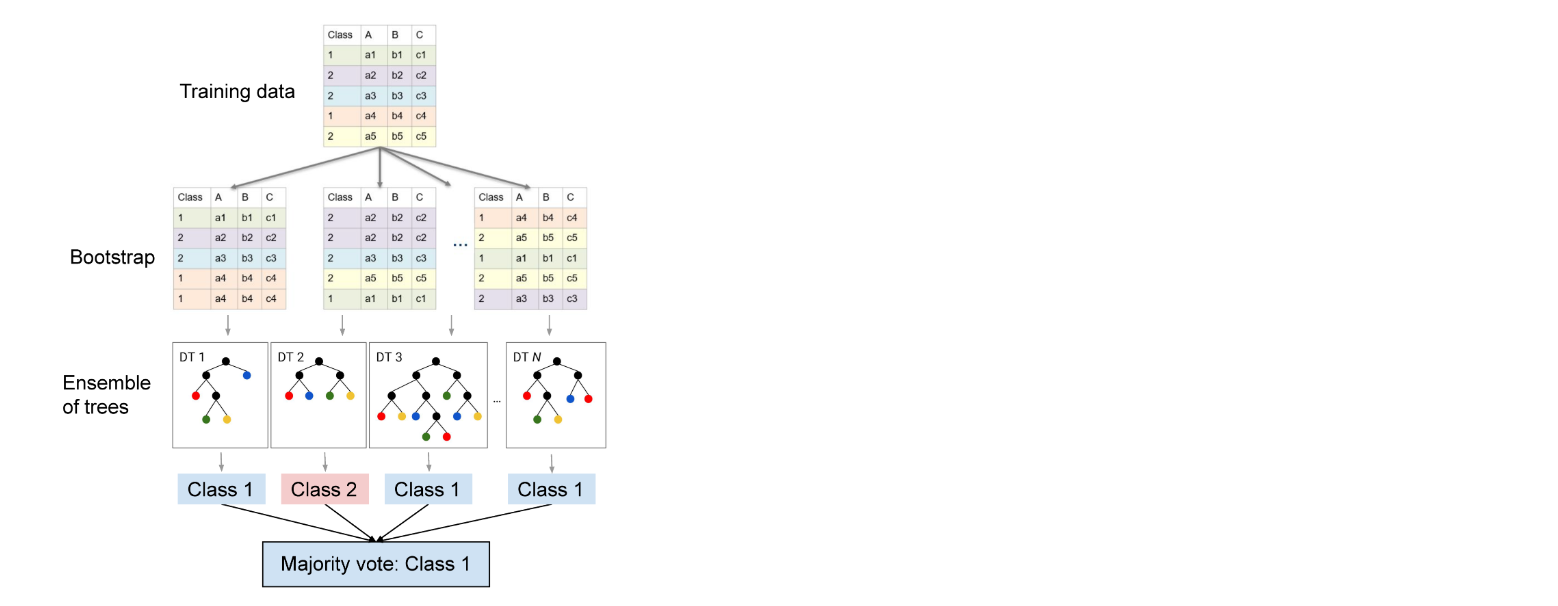

> **Build the model**

In [72]:
rf = RandomForestClassifier(max_depth = 6, random_state =100)
rf_model = rf.fit(x_train, y_train)
rf_model

RandomForestClassifier(max_depth=6, random_state=100)

> **Evaluate the model**

In [73]:
model_report(rf_model)

Train accuracy score: 0.8580952380952381
Test accuracy score: 0.8142857142857143

Train classification report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       525
           1       0.83      0.90      0.86       525

    accuracy                           0.86      1050
   macro avg       0.86      0.86      0.86      1050
weighted avg       0.86      0.86      0.86      1050

Test classification report
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       175
           1       0.80      0.85      0.82       175

    accuracy                           0.81       350
   macro avg       0.82      0.81      0.81       350
weighted avg       0.82      0.81      0.81       350


Train confusion matrix:
 [[426  99]
 [ 50 475]]
Test confusion matrix:
 [[137  38]
 [ 27 148]]


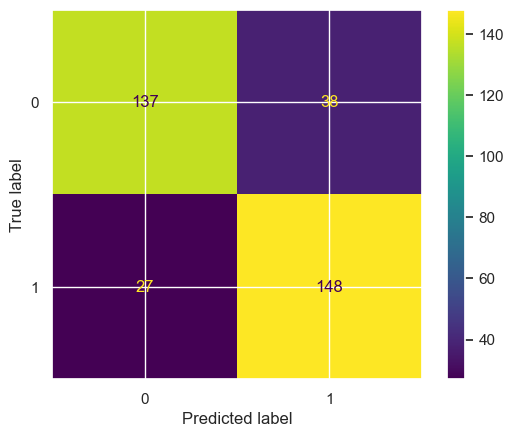

In [74]:
confus_matrix(rf_model)

In [75]:
cross_validation(rf_model)

Training CV: [0.73333333 0.75238095 0.77142857 0.78095238 0.76190476 0.73333333
 0.78095238 0.81904762 0.79047619 0.74285714]

Testing CV: [0.74285714 0.74285714 0.82857143 0.85714286 0.71428571 0.82857143
 0.74285714 0.74285714 0.88571429 0.71428571]

Avg_Training_CV: 0.7666666666666666

Avg_Testing_CV: 0.78


<br>

# 5. Support Vector Machine

* Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. 
* The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. 
* The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. 

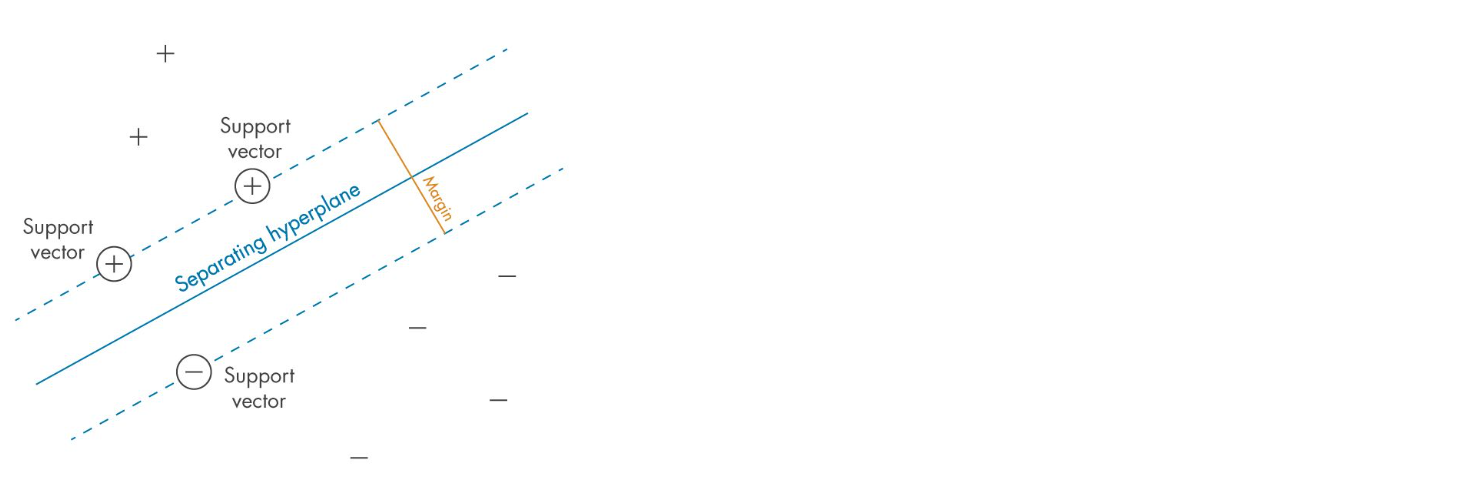

**Types of SVM:**

1. Linear SVM
2. Non-Linear SVM

**SVM Terminology:**

1. <u>Support Vectors</u>: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.
2. <u>Margin:</u> Margin is the distance between the support vector and hyperplane. The main objective of the support vector machine algorithm is to maximize the margin.  The wider margin indicates better classification performance.
        Types of margin: 1. Soft Margin 2. Hard Margin
3. <u>Hyperplane:</u> Hyperplane is the decision boundary that is used to separate the data points of different classes in a feature space. The hyperplane is also called as "decision boundary" or "maximum margin hyperplane".
        * If the distance between the decision boundary and the data point is relatively large then it means that the model is somewhat confident about its prediction.
        * If the distance between the decision boundary and the data point is relatively low then it means that the model is less confident about its prediction.

4. <u>Kernel:</u> Some of the common kernel functions are **_linear, polynomial, radial basis function(RBF), and sigmoid_**.
5. <u>Hinge Loss:</u> Hinge loss is a function popularly used in support vector machine algorithms to measure the distance of data points from the decision boundary. This helps approximate the possibility of incorrect predictions and evaluate the model's performance.
 

> **Build the model**

In [76]:
svm = SVC(kernel = 'linear', random_state = 100)
svm_model = svm.fit(x_train, y_train)

> **Evaluate the model**

In [77]:
model_report(svm_model)

Train accuracy score: 0.719047619047619
Test accuracy score: 0.7171428571428572

Train classification report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       525
           1       0.72      0.73      0.72       525

    accuracy                           0.72      1050
   macro avg       0.72      0.72      0.72      1050
weighted avg       0.72      0.72      0.72      1050

Test classification report
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       175
           1       0.72      0.70      0.71       175

    accuracy                           0.72       350
   macro avg       0.72      0.72      0.72       350
weighted avg       0.72      0.72      0.72       350


Train confusion matrix:
 [[374 151]
 [144 381]]
Test confusion matrix:
 [[128  47]
 [ 52 123]]


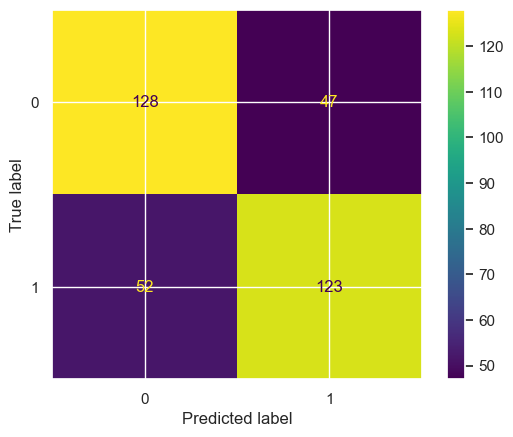

In [78]:
confus_matrix(svm_model)

In [79]:
cross_validation(svm_model)

Training CV: [0.62857143 0.68571429 0.66666667 0.7047619  0.61904762 0.62857143
 0.74285714 0.76190476 0.66666667 0.71428571]

Testing CV: [0.62857143 0.6        0.8        0.71428571 0.71428571 0.8
 0.74285714 0.68571429 0.91428571 0.68571429]

Avg_Training_CV: 0.681904761904762

Avg_Testing_CV: 0.7285714285714286


<br>

# Results

In [80]:

dict_model = {'Logistic Regression':LogisticRegression(),'Decision Tree': DecisionTreeClassifier(max_depth = 5, random_state = 101), 
              'Bagging': BaggingClassifier( base_estimator = DecisionTreeClassifier(max_depth =4), random_state = 101 ), 
              'Random Forest':RandomForestClassifier(max_depth =6, random_state = 101), 
              'Support Vector Machine':SVC(kernel = 'linear', random_state = 101)  }

def cross_validation(model):
    Training_CV = cross_val_score(model, x_train, y_train, cv =10).mean()
    Testing_CV = cross_val_score(model, x_test, y_test, cv= 10).mean()
    return (Training_CV*100).round(2), (Testing_CV*100).round(2)

d = {}
d1 = {}

for i in list(dict_model.keys()):
    mdl = dict_model[i]
    model = mdl.fit(x_train, y_train)
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_predict_train)
    train_acc = (train_acc*100).round(2)
    test_acc = accuracy_score(y_test, y_predict_test)
    test_acc = (test_acc*100).round(2)
    d.setdefault(i,[]).append(train_acc)
    d.setdefault(i,[]).append(test_acc)
    x, y = cross_validation(model)
    d1.setdefault(i,[]).append(x)
    d1.setdefault(i,[]).append(y)

#Accuracy Score
print("Accuracy Score of Model:\n")
print(pd.DataFrame(d , index = ['Train Accuracy', 'Test Accuracy'] ).T, '\n\n')
print("Cross Validation Accuracy Score of Model:\n") 
print(pd.DataFrame(d1 , index = ['CV Train Accuracy', 'CV Test Accuracy'] ).T)
    

Accuracy Score of Model:

                        Train Accuracy  Test Accuracy
Logistic Regression              70.29          73.14
Decision Tree                    76.19          73.43
Bagging                          77.24          72.29
Random Forest                    84.67          81.14
Support Vector Machine           71.90          71.71 


Cross Validation Accuracy Score of Model:

                        CV Train Accuracy  CV Test Accuracy
Logistic Regression                 68.10             72.86
Decision Tree                       71.43             71.14
Bagging                             71.24             71.14
Random Forest                       76.38             76.29
Support Vector Machine              68.19             72.86


> **Here, we can see the random forest algorithm is giving the better results among all other algorithms.**

# Hyparameter Tunning for Logistic Regression & Support Vector Machine

In [81]:
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression

In [82]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 100 ]}

grid_s_lr = GridSearchCV(LogisticRegression(), param_grid, cv =10, scoring = 'accuracy')
grid_s_lr.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100]}, scoring='accuracy')

In [83]:
grid_lr_predict_test = grid_s_lr.predict(x_test)
grid_lr_predict_train = grid_s_lr.predict(x_train)

In [84]:
#grid = {'Logistic Regression'}

grid_lr = {}

lr_train_acc_grid = accuracy_score(y_train,grid_lr_predict_train )
lr_test_acc_grid = accuracy_score(y_test,grid_lr_predict_test )
grid_lr.setdefault('train_acc_grid',[]).append((lr_train_acc_grid*100).round(2))
grid_lr.setdefault('test_acc_grid',[]).append((lr_test_acc_grid*100).round(2))

In [85]:
pd.DataFrame(grid_lr)

train_acc_grid  test_acc_grid
0           71.33           74.0

In [86]:
grid_s_lr.best_params_

{'C': 0.01}

## 2. Support Vector Machine

In [87]:
param_grid = {'kernel':['linear','rbf'],'C': [ 0.001, 0.01, 0.1], 'gamma':[0.001, 0.01, 0.1]}

grid_s_sv = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv =10, scoring = 'accuracy')
grid_s_sv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [88]:
grid_sv_predict_test = grid_s_sv.predict(x_test)
grid_sv_predict_train = grid_s_sv.predict(x_train)

In [89]:
grid_sv = {}
sv_train_acc_grid = accuracy_score(y_train,grid_sv_predict_train )
sv_test_acc_grid = accuracy_score(y_test,grid_sv_predict_test )
grid_sv.setdefault('train_acc_grid',[]).append((sv_train_acc_grid*100).round(2))
grid_sv.setdefault('test_acc_grid',[]).append((sv_test_acc_grid*100).round(2))

In [90]:
pd.DataFrame(grid_sv)

train_acc_grid  test_acc_grid
0           70.86          71.14

In [91]:
grid_s_sv.best_params_

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

## Results for hypperparemeter tunning

In [92]:
grid = {}

grid.setdefault('Logistic Regression',[]).append((lr_train_acc_grid*100).round(2))
grid.setdefault('Logistic Regression',[]).append((lr_test_acc_grid*100).round(2))
grid.setdefault('Support Vector Machine',[]).append((sv_train_acc_grid*100).round(2))
grid.setdefault('Support Vector Machine',[]).append((sv_test_acc_grid*100).round(2))
                                                 

In [93]:
pd.DataFrame(grid, index = ['Train Accuracy', 'Test Accuracy']).T

Train Accuracy  Test Accuracy
Logistic Regression              71.33          74.00
Support Vector Machine           70.86          71.14

# Final Results

In [94]:
res= {}
res.update(d1)
res.update(grid)

In [95]:
print("Accuracy Score of Model:\n")
print(pd.DataFrame(d , index = ['Train Accuracy', 'Test Accuracy'] ).T, '\n\n')
print("Cross Validation Accuracy Score of Model:\n") 
print(pd.DataFrame(res , index = ['CV Train Accuracy', 'CV Test Accuracy'] ).T)

Accuracy Score of Model:

                        Train Accuracy  Test Accuracy
Logistic Regression              70.29          73.14
Decision Tree                    76.19          73.43
Bagging                          77.24          72.29
Random Forest                    84.67          81.14
Support Vector Machine           71.90          71.71 


Cross Validation Accuracy Score of Model:

                        CV Train Accuracy  CV Test Accuracy
Logistic Regression                 71.33             74.00
Decision Tree                       71.43             71.14
Bagging                             71.24             71.14
Random Forest                       76.38             76.29
Support Vector Machine              70.86             71.14


# Anomaly Detection

In [ ]:
# isolation forest
# local outlier factor